# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [64]:
!pip install folium

In [65]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [66]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

np.random.seed(191)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [67]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          13154        270  1.0              
iamavyukt/goibibo-flight-data                                Goibibo Flight Data                              2MB  2024-10-17 14:42:37           1059         23  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           6901        113  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors            

In [68]:
!kaggle competitions download -c nyc-taxi-trip-duration

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
!mkdir -p nyc-taxi-trip-duration
!unzip nyc-taxi-trip-duration.zip -d nyc-taxi-trip-duration

Archive:  nyc-taxi-trip-duration.zip
replace nyc-taxi-trip-duration/sample_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: nyc-taxi-trip-duration/sample_submission.zip  
replace nyc-taxi-trip-duration/test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: nyc-taxi-trip-duration/test.zip  y

replace nyc-taxi-trip-duration/train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: nyc-taxi-trip-duration/train.zip  y
y



In [70]:
df_train = pd.read_csv('nyc-taxi-trip-duration/train.zip')

In [71]:
df_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop(labels='dropoff_datetime', axis=1, inplace=True)
df_train.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id2875421          2  2016-03-14 17:24:55                1   
1  id2377394          1  2016-06-12 00:43:35                1   
2  id3858529          2  2016-01-19 11:35:24                1   
3  id3504673          2  2016-04-06 19:32:31                1   
4  id2181028          2  2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

In [73]:
from datetime import datetime
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

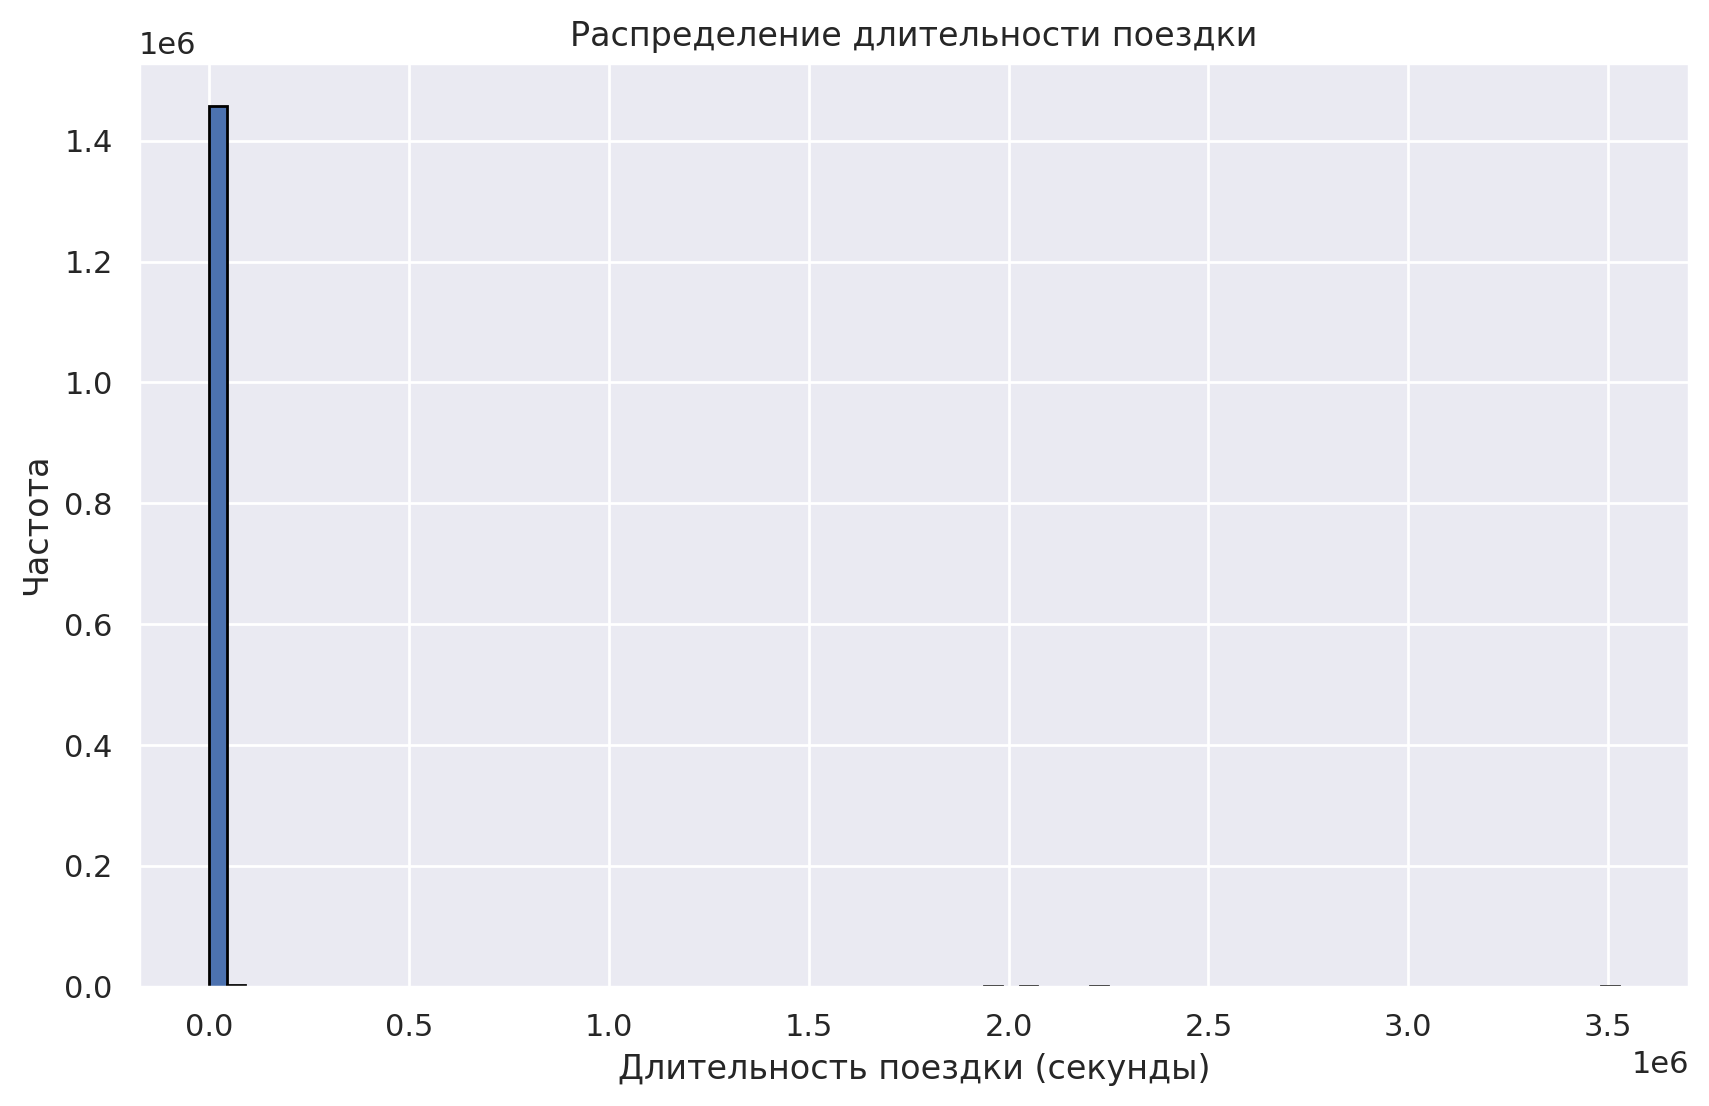

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 6))
df_train['trip_duration'].hist(bins=80, edgecolor='black')
plt.title('Распределение длительности поездки')
plt.xlabel('Длительность поездки (секунды)')
plt.ylabel('Частота')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Видим наличие выбросов - слишком длинных поездок более 80 000 секунд (22 часов), скорее всего, это аномалии, от которых нам будет необходимр избавиться.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Авторы соревнования использовали данную метрику, так как распределение нашей целевой переменной логарифмическое, то есть нам важен порядок значения.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Подставим ${y}_i$ = ${a}_i$ и $\hat{y}_i$ = $\hat{a}_i$:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(a(x_i) + 1)} - \log{(\hat{a}(x_i)_i + 1)}\big)^2}$$
Подстановка в RMSLE:
$\log(a(x_i) + 1)$ = $\log(\exp(\hat{a}(x_i)) - 1 + 1)$ = $\log(\exp(\hat{a(x_i}))$ = $\hat{a}(x_i)$
Таким образом, получаем:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big({a(x_i)} - \big(\log{(\hat{y}(x_i)_i + 1)}\big)^2}$$
Таким образом, минимизация RMSLE эквивалентна минимизации MSE для логарифмированных значений.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [75]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'])

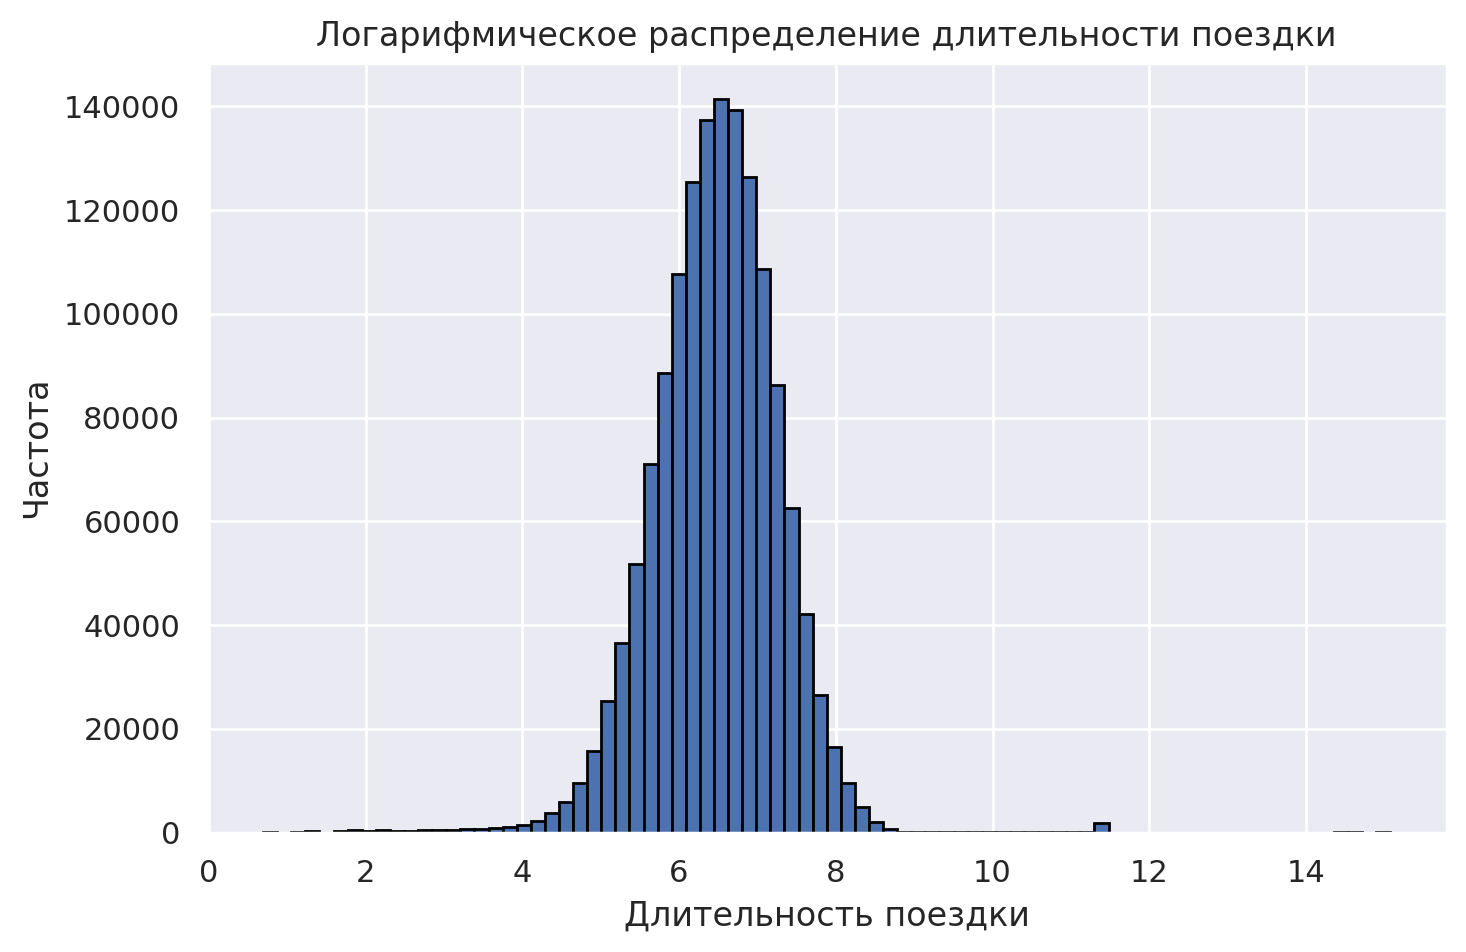

In [76]:
df_train['log_trip_duration'].hist(bins=80, edgecolor='black')
plt.title('Логарифмическое распределение длительности поездки')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.show()

In [77]:
#df_train.drop(labels='trip_duration', axis=1, inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [78]:
best_constant_prediction = df_train['log_trip_duration'].mean()

def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return np.sum((log1p_y_true - log1p_y_pred) ** 2)
predictions = pd.Series([best_constant_prediction] * df_train.shape[0])

rmsle_best_const = np.sqrt(rmsle(df_train['log_trip_duration'], predictions)/len(df_train['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

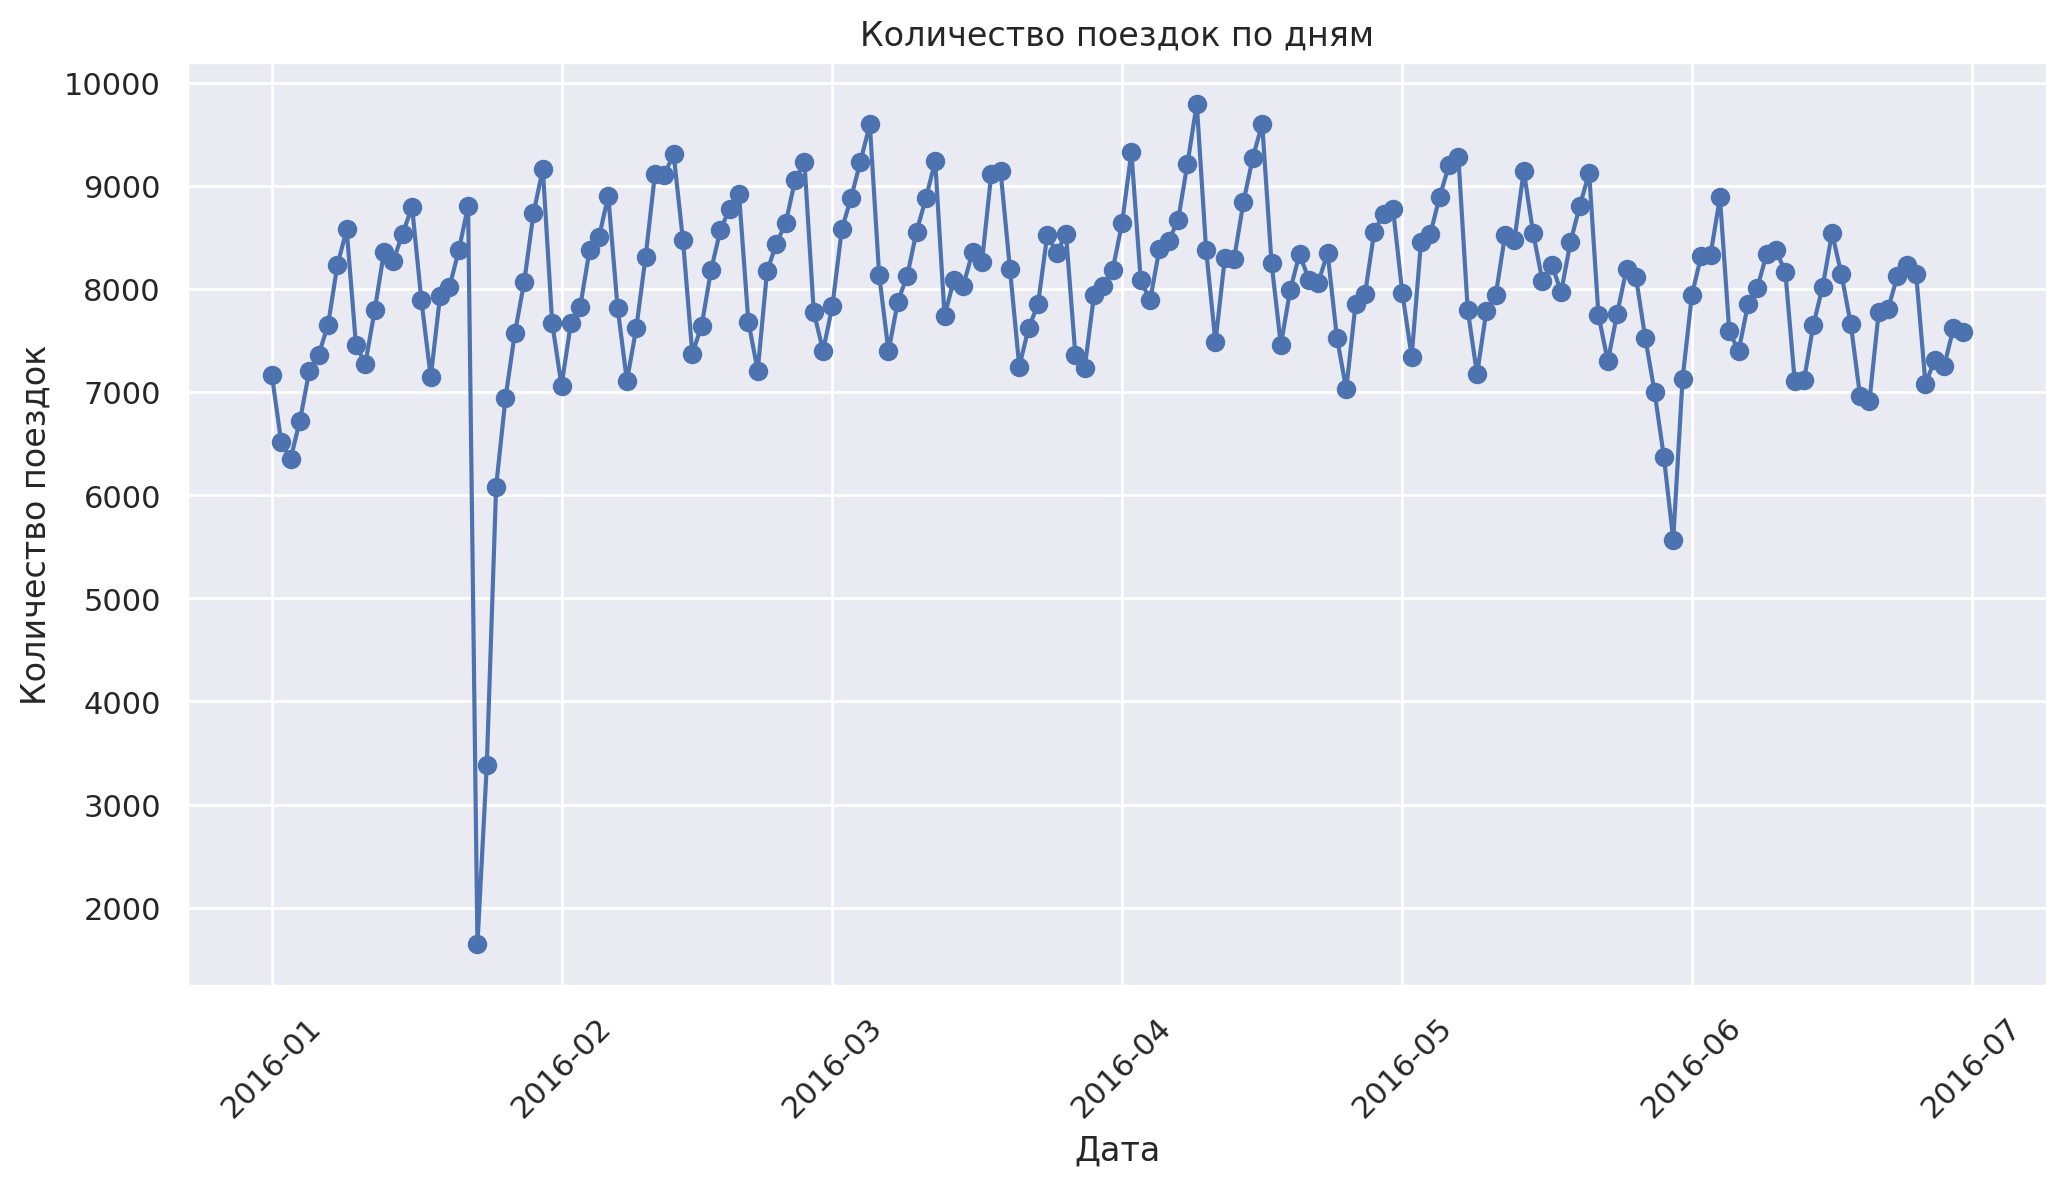

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['pickup_date'] = df_train['pickup_datetime'].dt.date

# Группируем данные по дате и считаем количество поездок
daily_trip_counts = df_train.groupby('pickup_date').size()

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(daily_trip_counts.index, daily_trip_counts.values, marker='o', linestyle='-')
plt.title('Количество поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [80]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
threshold = daily_trip_counts.mean() - 2 * daily_trip_counts.std()
anomalous_dates = daily_trip_counts[daily_trip_counts < threshold]

print("Аномальные даты и количество поездок:")
print(anomalous_dates)

Аномальные даты и количество поездок:
pickup_date
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-05-30    5570
dtype: int64


Видим, что наименьшее количество поездок наблюдается в 2 периода - 23-25 января и 30 мая.
23 января 2016 года власти запретили автомобильное движение в Нью-Йорке из-за снежной бури, 30 мая 2016 года в Нью-Йорке отмечался Мемориальный день, который является федеральным праздником в США, а также девять человек пострадали в результате серии нападений со стрельбой.

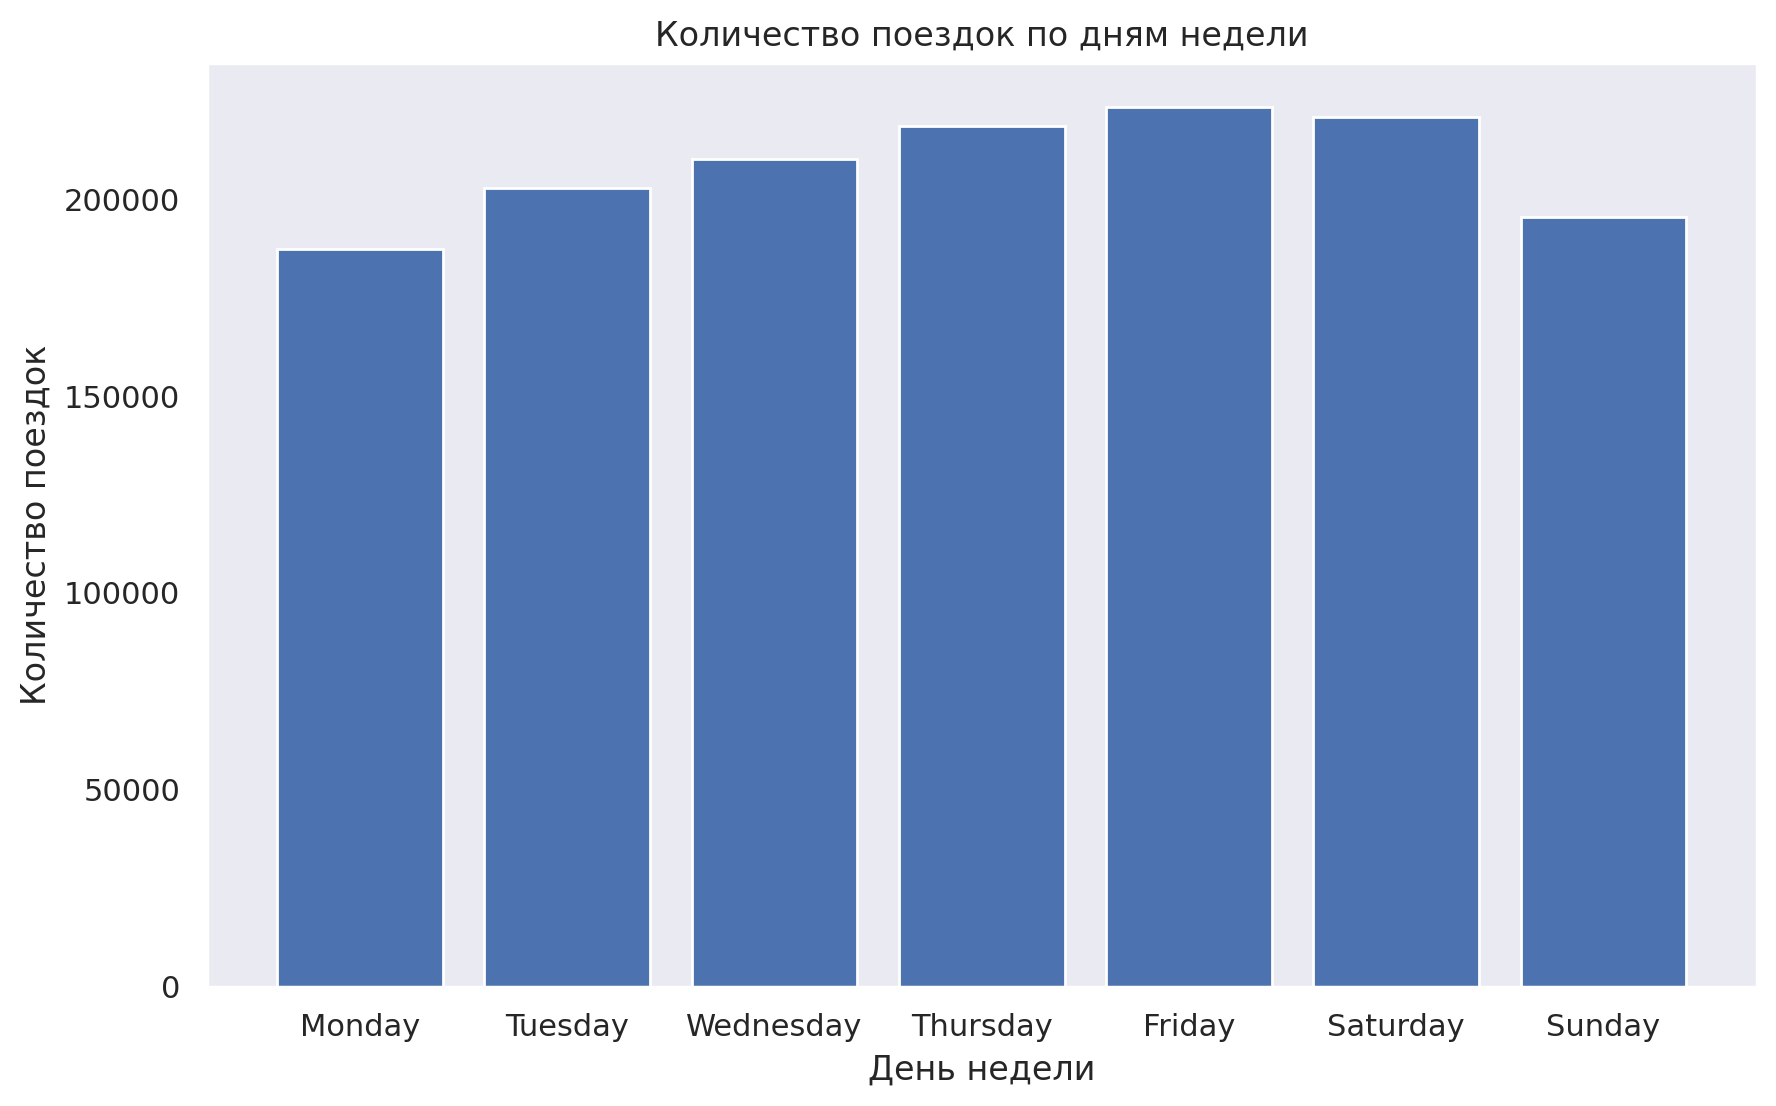

In [81]:
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()

weekly_trip_counts = df_train.groupby('day_of_week').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_trip_counts = weekly_trip_counts.reindex(days_order)

plt.figure(figsize=(10, 6))
plt.bar(weekly_trip_counts.index, weekly_trip_counts.values)
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

Наименьшее количество поездок наблюдается в понедельник и в воскресенье.

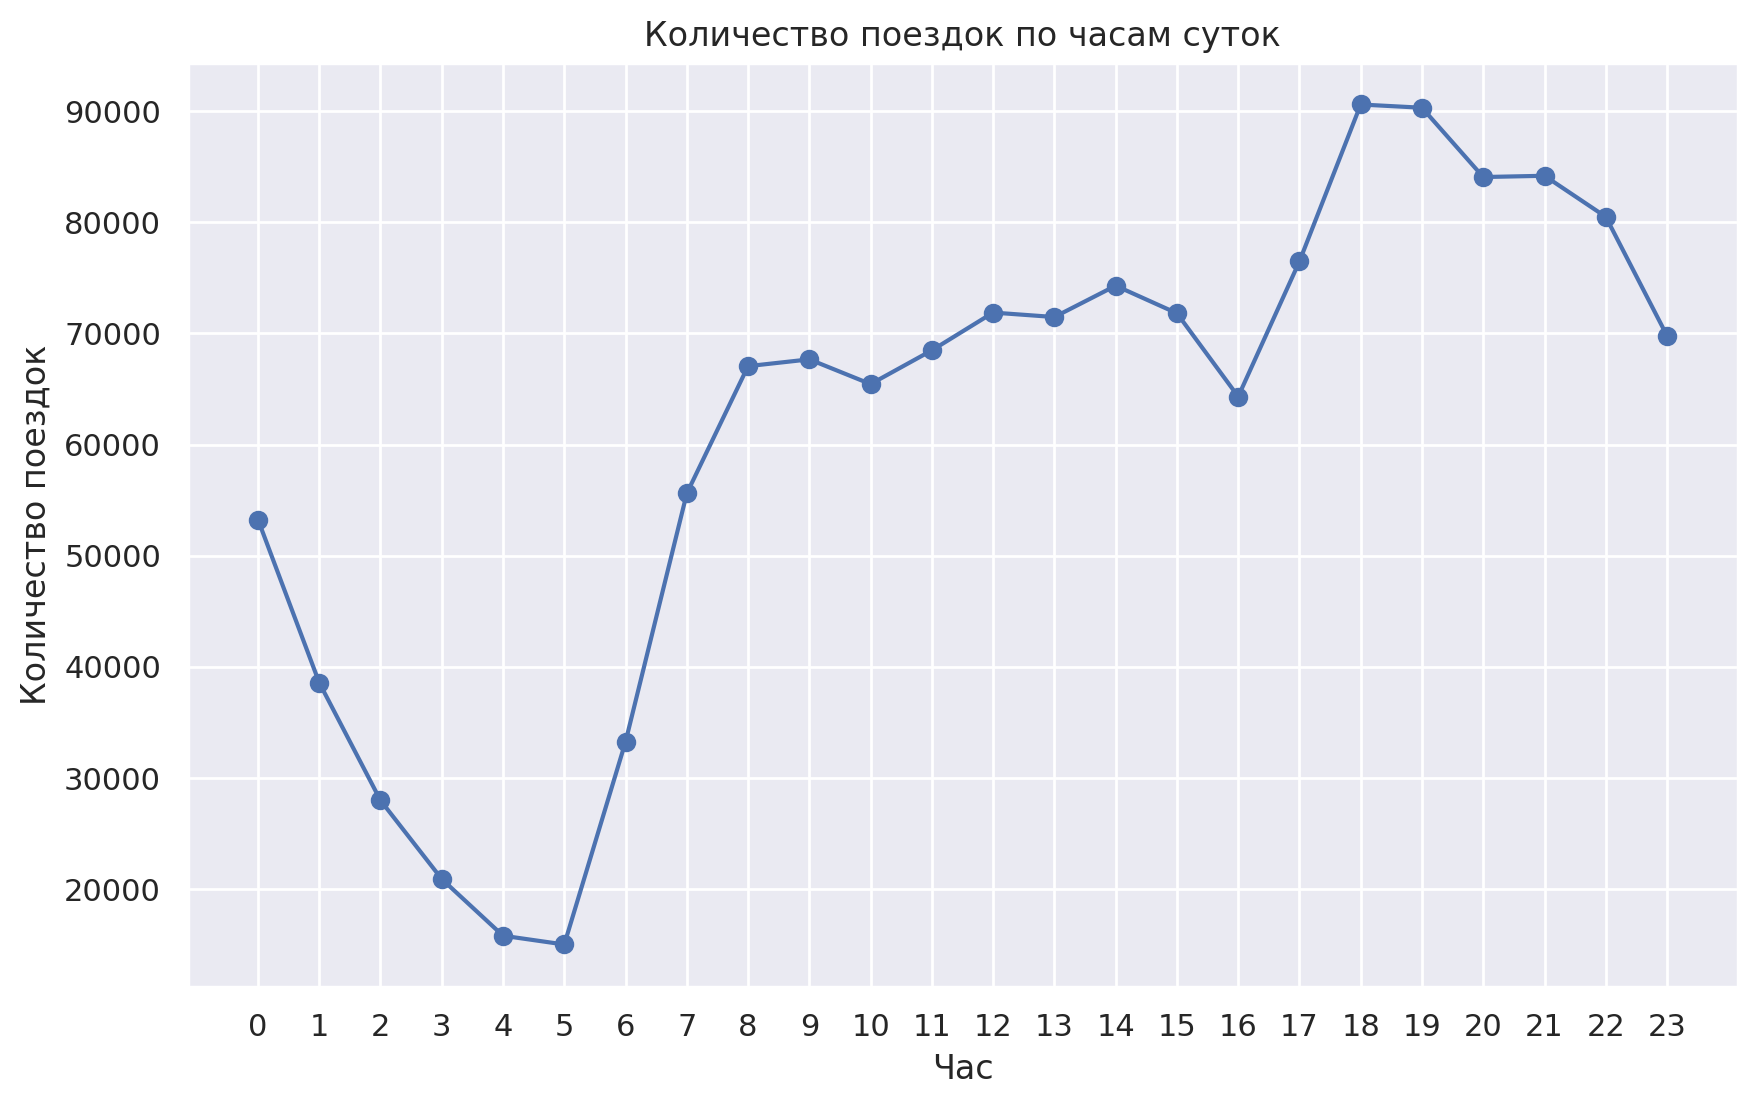

In [82]:
df_train['hour'] = df_train['pickup_datetime'].dt.hour

hourly_trip_counts = df_train.groupby('hour').size()

plt.figure(figsize=(10, 6))
plt.plot(hourly_trip_counts.index, hourly_trip_counts.values, marker='o', linestyle='-')
plt.title('Количество поездок по часам суток')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Устанавливаем метки по всем часам
plt.show()

Наименьшее количество поездок приходится на период 1-6 часов, что логично, наибольшая активность 18-19 часов вечера, час пик, когда люди возвращаются с работы.

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

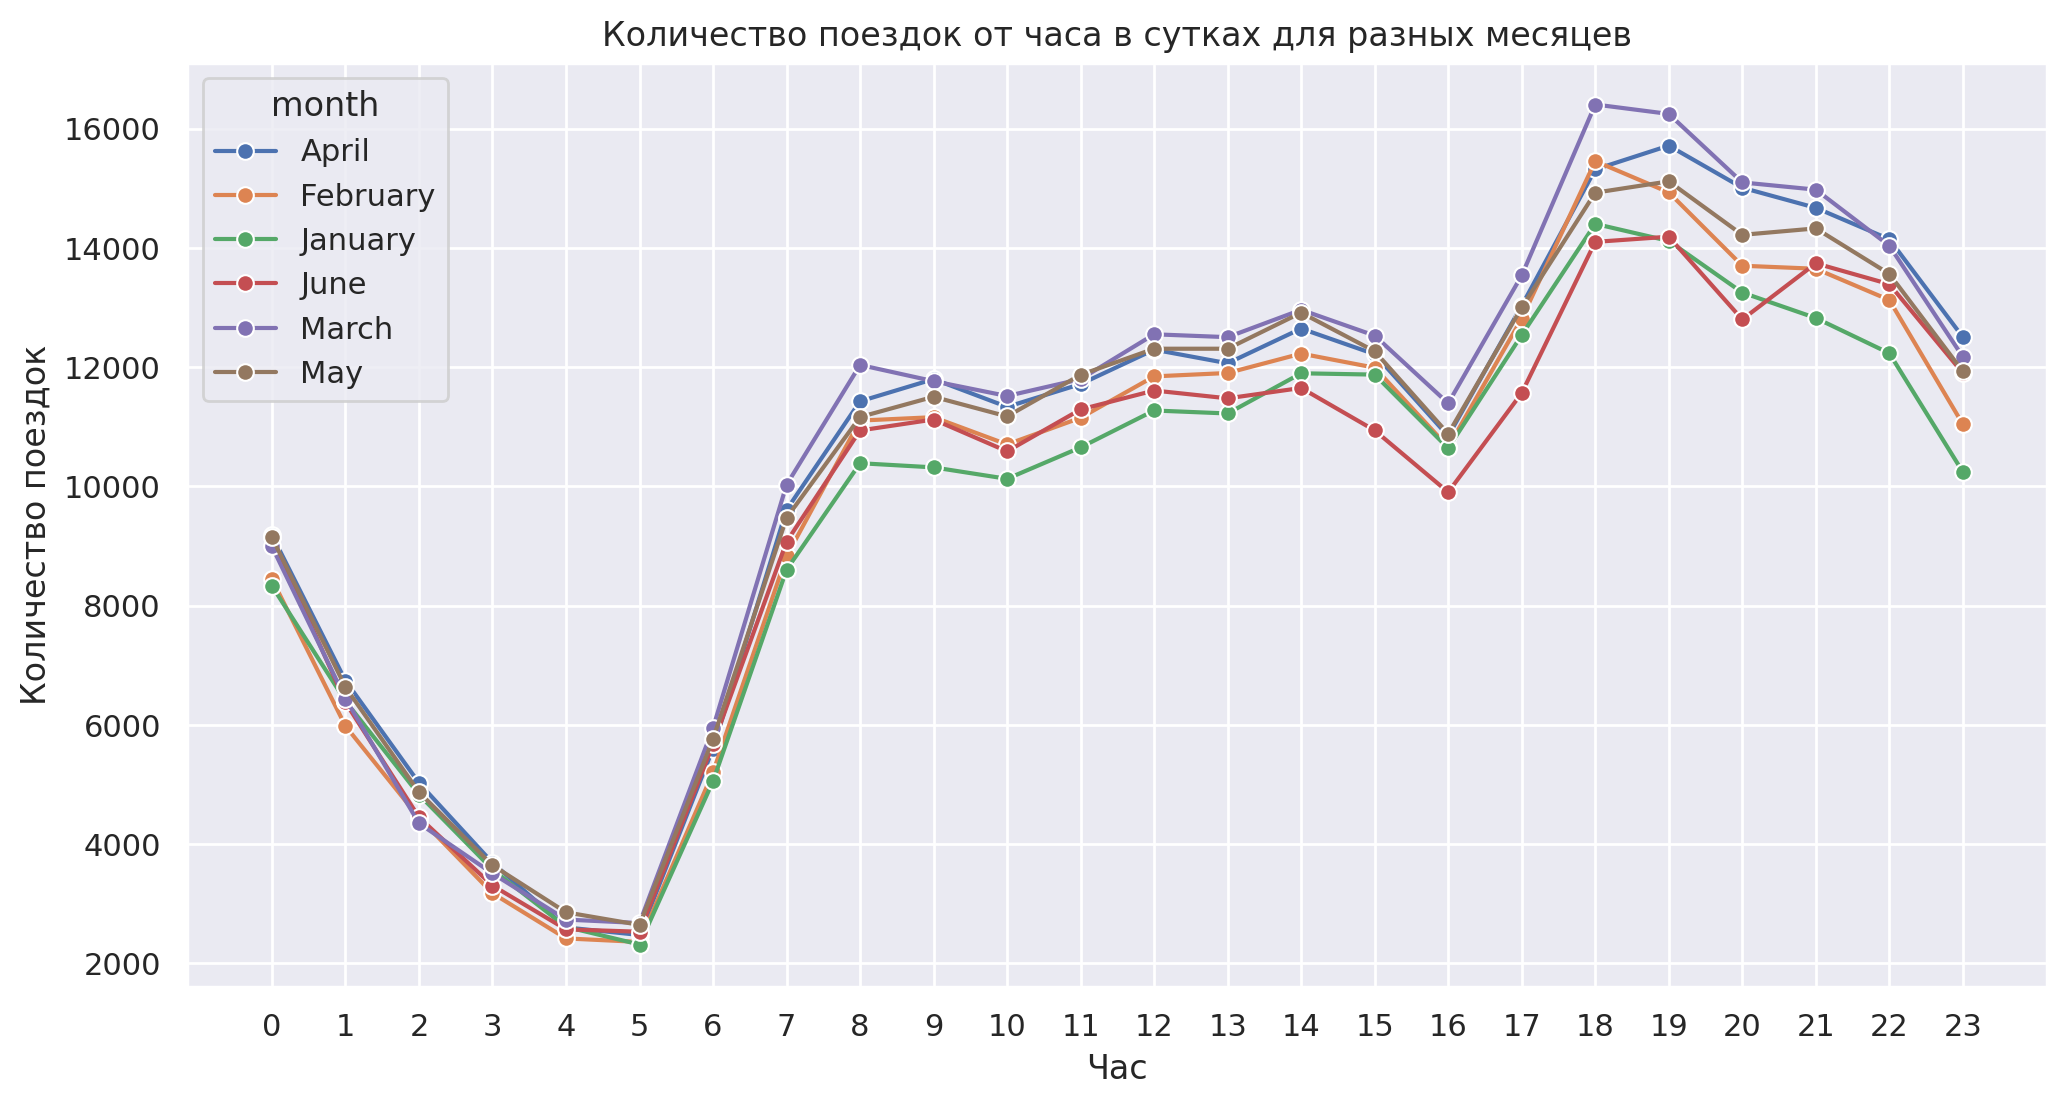

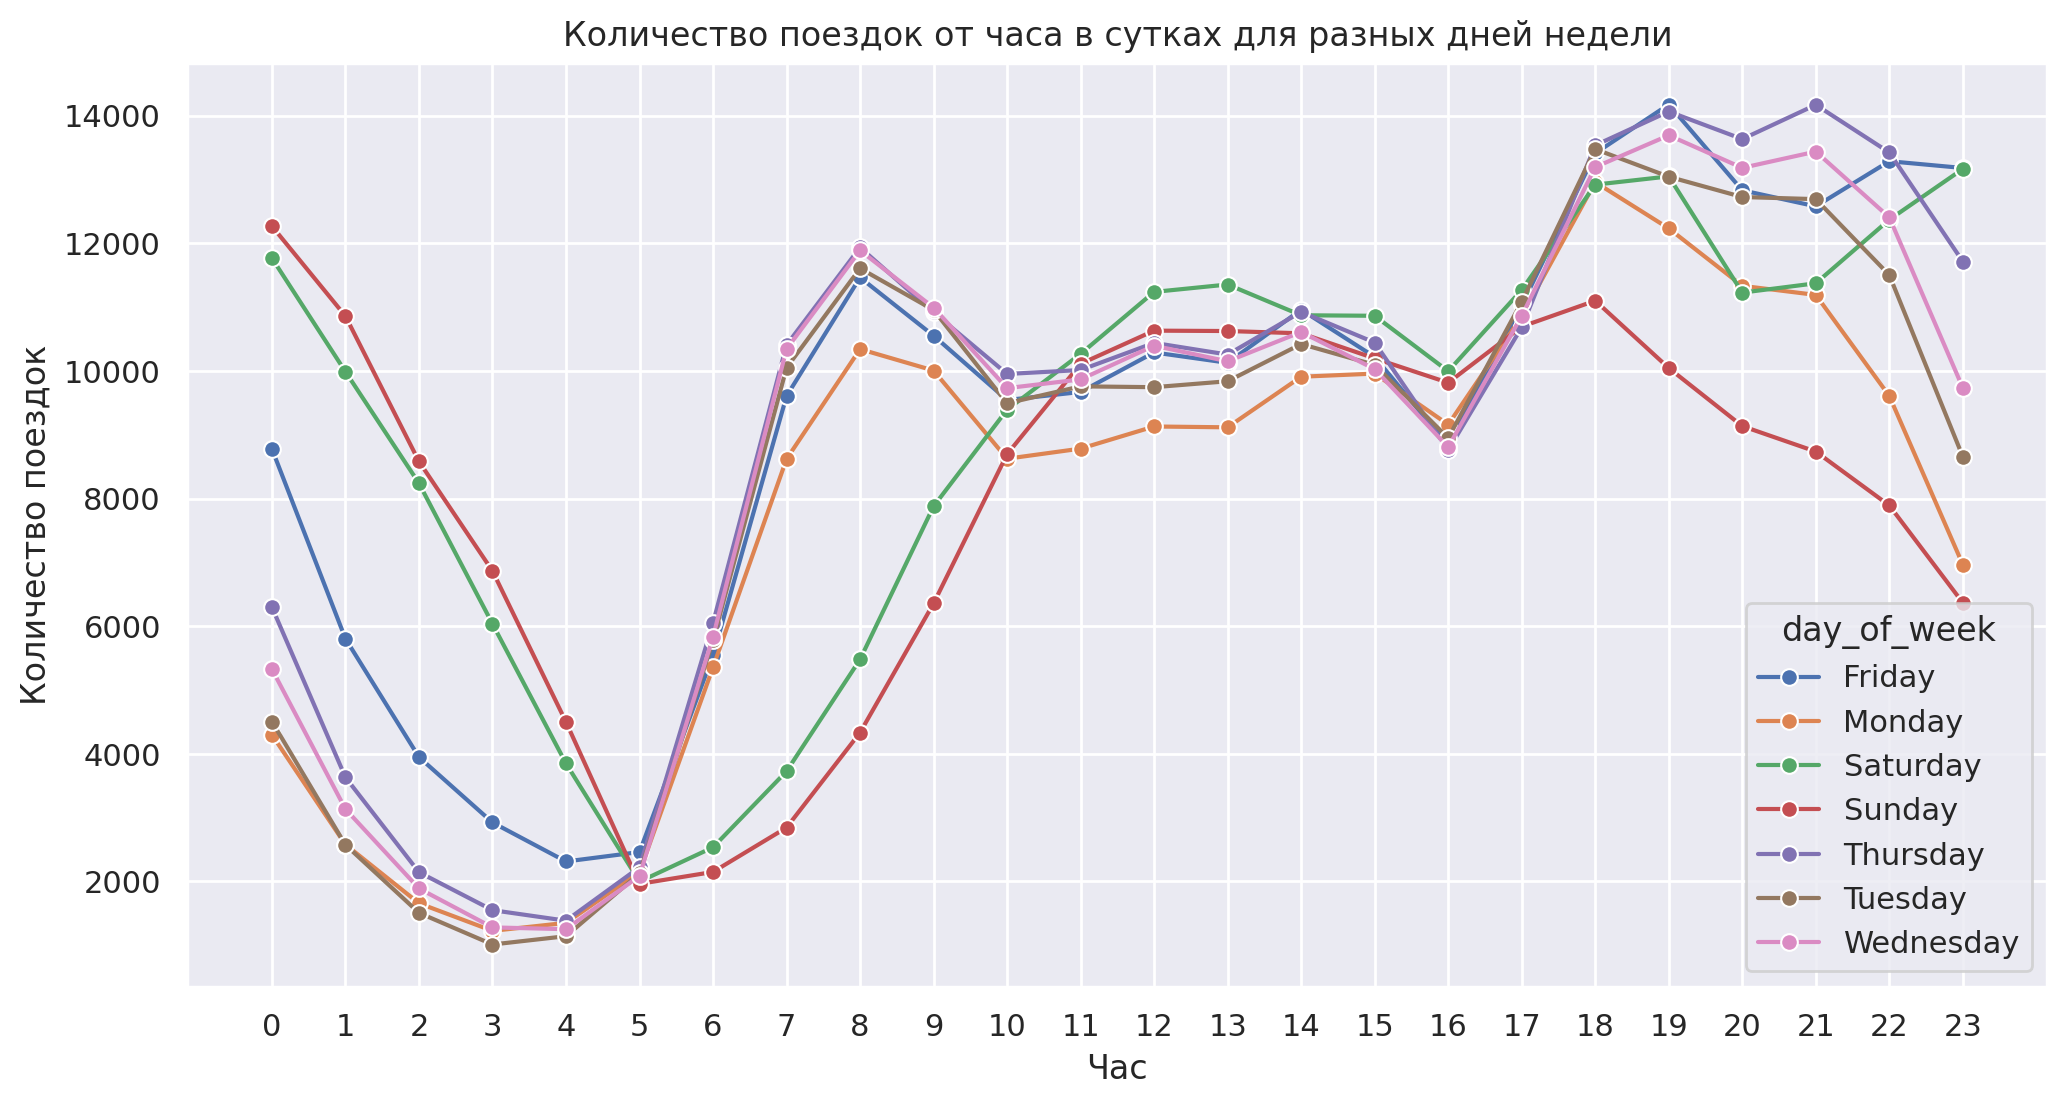

In [83]:
df_train['month'] = df_train['pickup_datetime'].dt.month_name()

# Группировка по месяцам
monthly_counts = df_train.groupby(['month', 'hour']).size().reset_index(name='count')

# Визуализация зависимости количества поездок от часа в сутках для разных месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='hour', y='count', hue='month', marker='o')
plt.title('Количество поездок от часа в сутках для разных месяцев')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Для отображения всех часов
plt.show()

# Группировка по дням недели
weekly_counts = df_train.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

# Визуализация зависимости количества поездок от часа в сутках для разных дней недели
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_counts, x='hour', y='count', hue='day_of_week', marker='o')
plt.title('Количество поездок от часа в сутках для разных дней недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Для отображения всех часов
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

*По месяцам отличия в количестве поездок не самое очевидное, реже такси пользуются в июне, что может быть связано с хорошей погодой, а также в январе, возможно из-за праздников и снегопада в конце января 2016 года в Нью Йорке. По дням недели наблюдаем большее количество ночных и вечерних поездок на выходных, в то время как в начале рабочей недели такси в большей степени пользуется спросом в утренние часы и в час пик после рабочего дня.*

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

<ipython-input-84-aae501e8f58b>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=mean_log_duration_by_weekday, x='day_of_week', y='log_trip_duration', marker='o', palette='coolwarm')


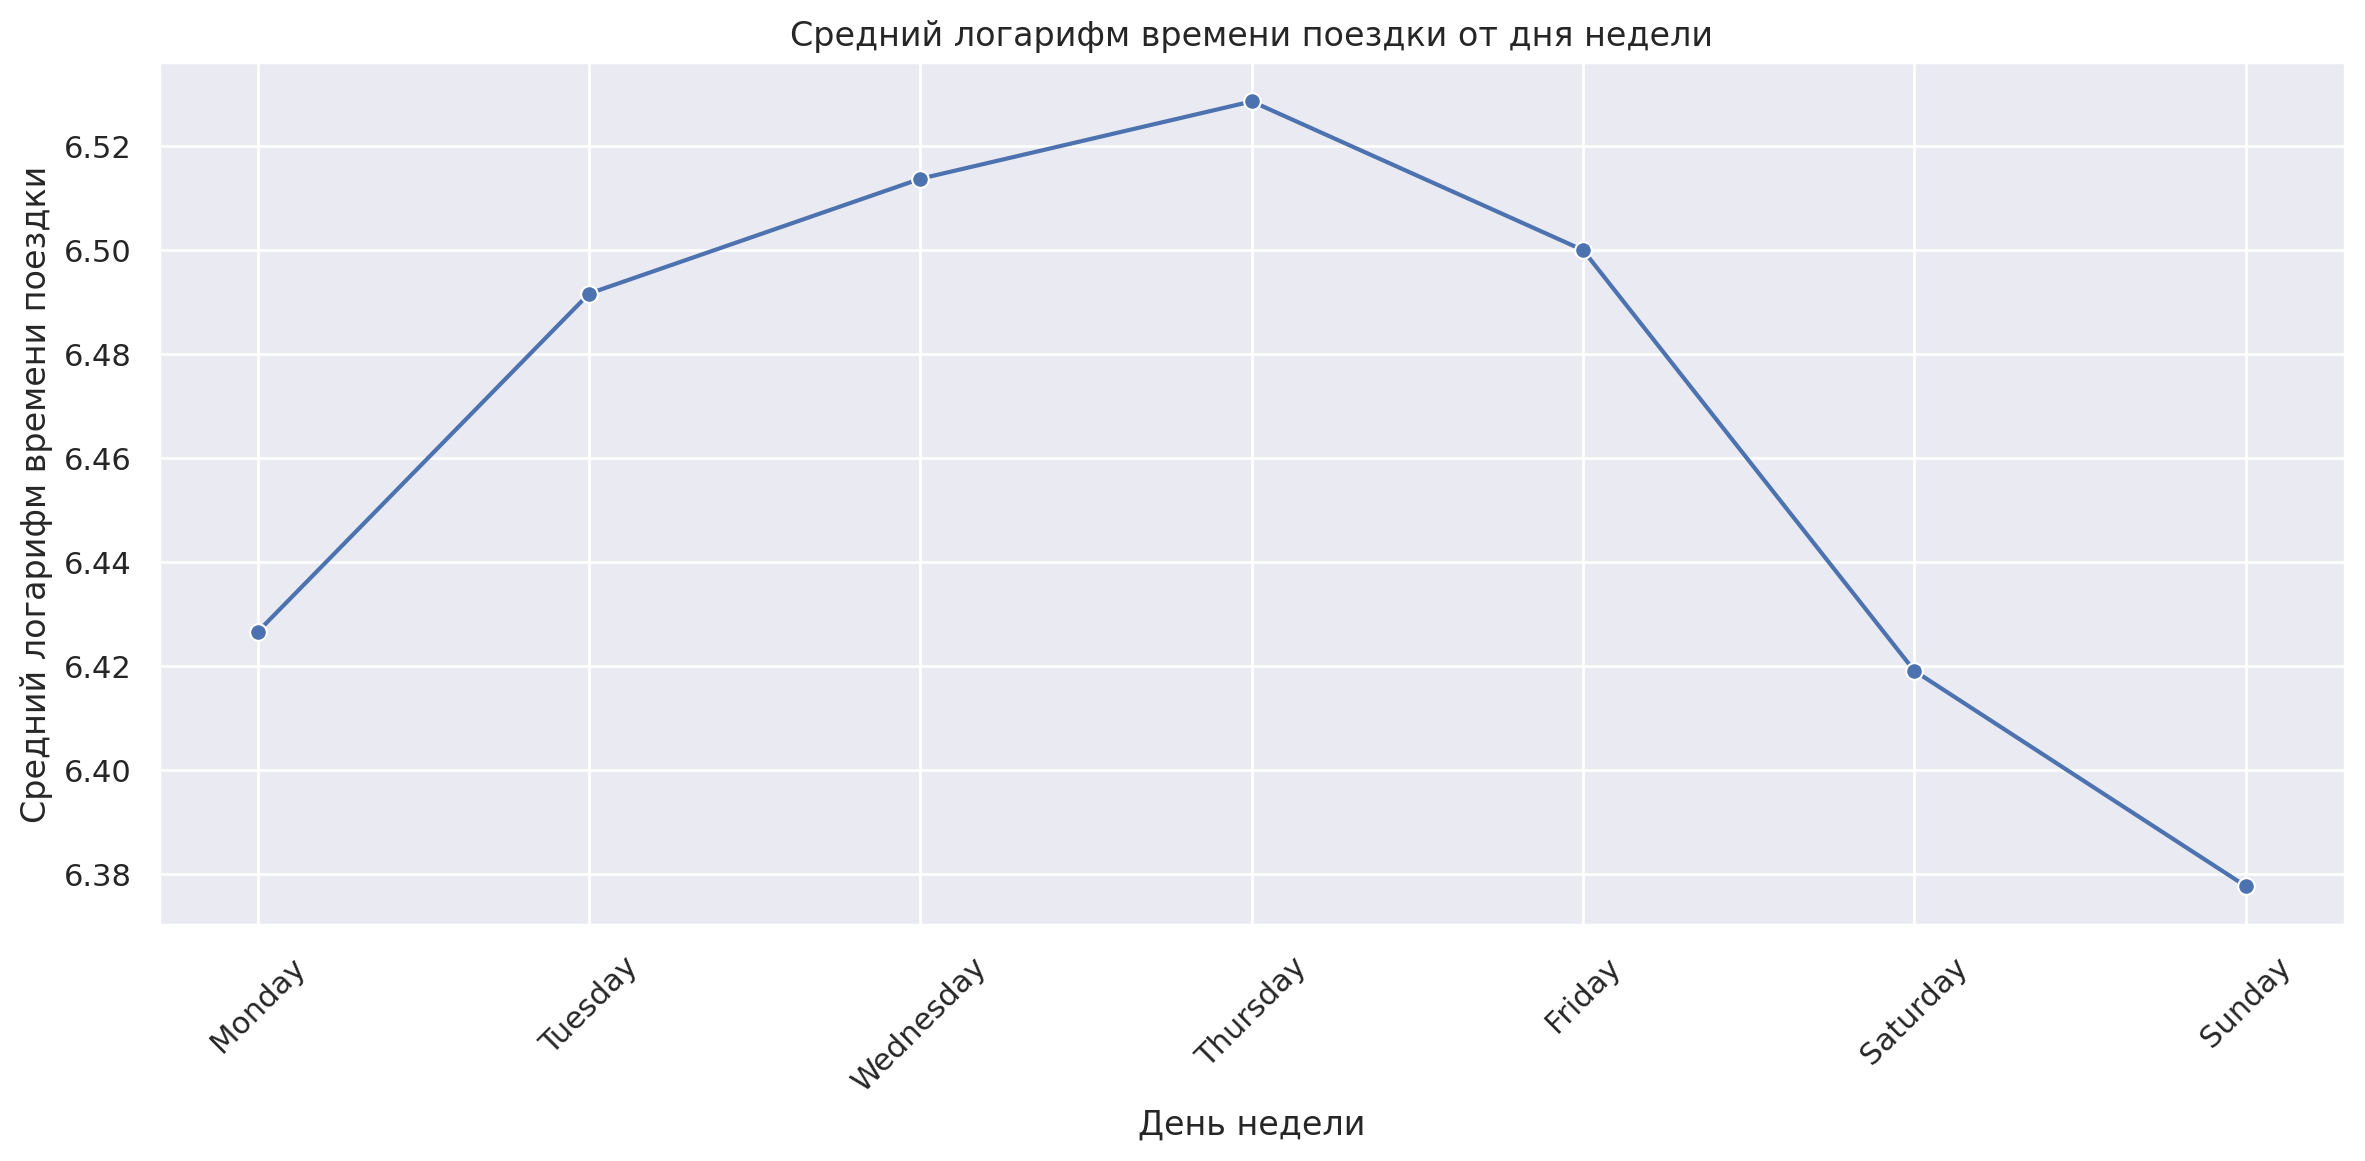

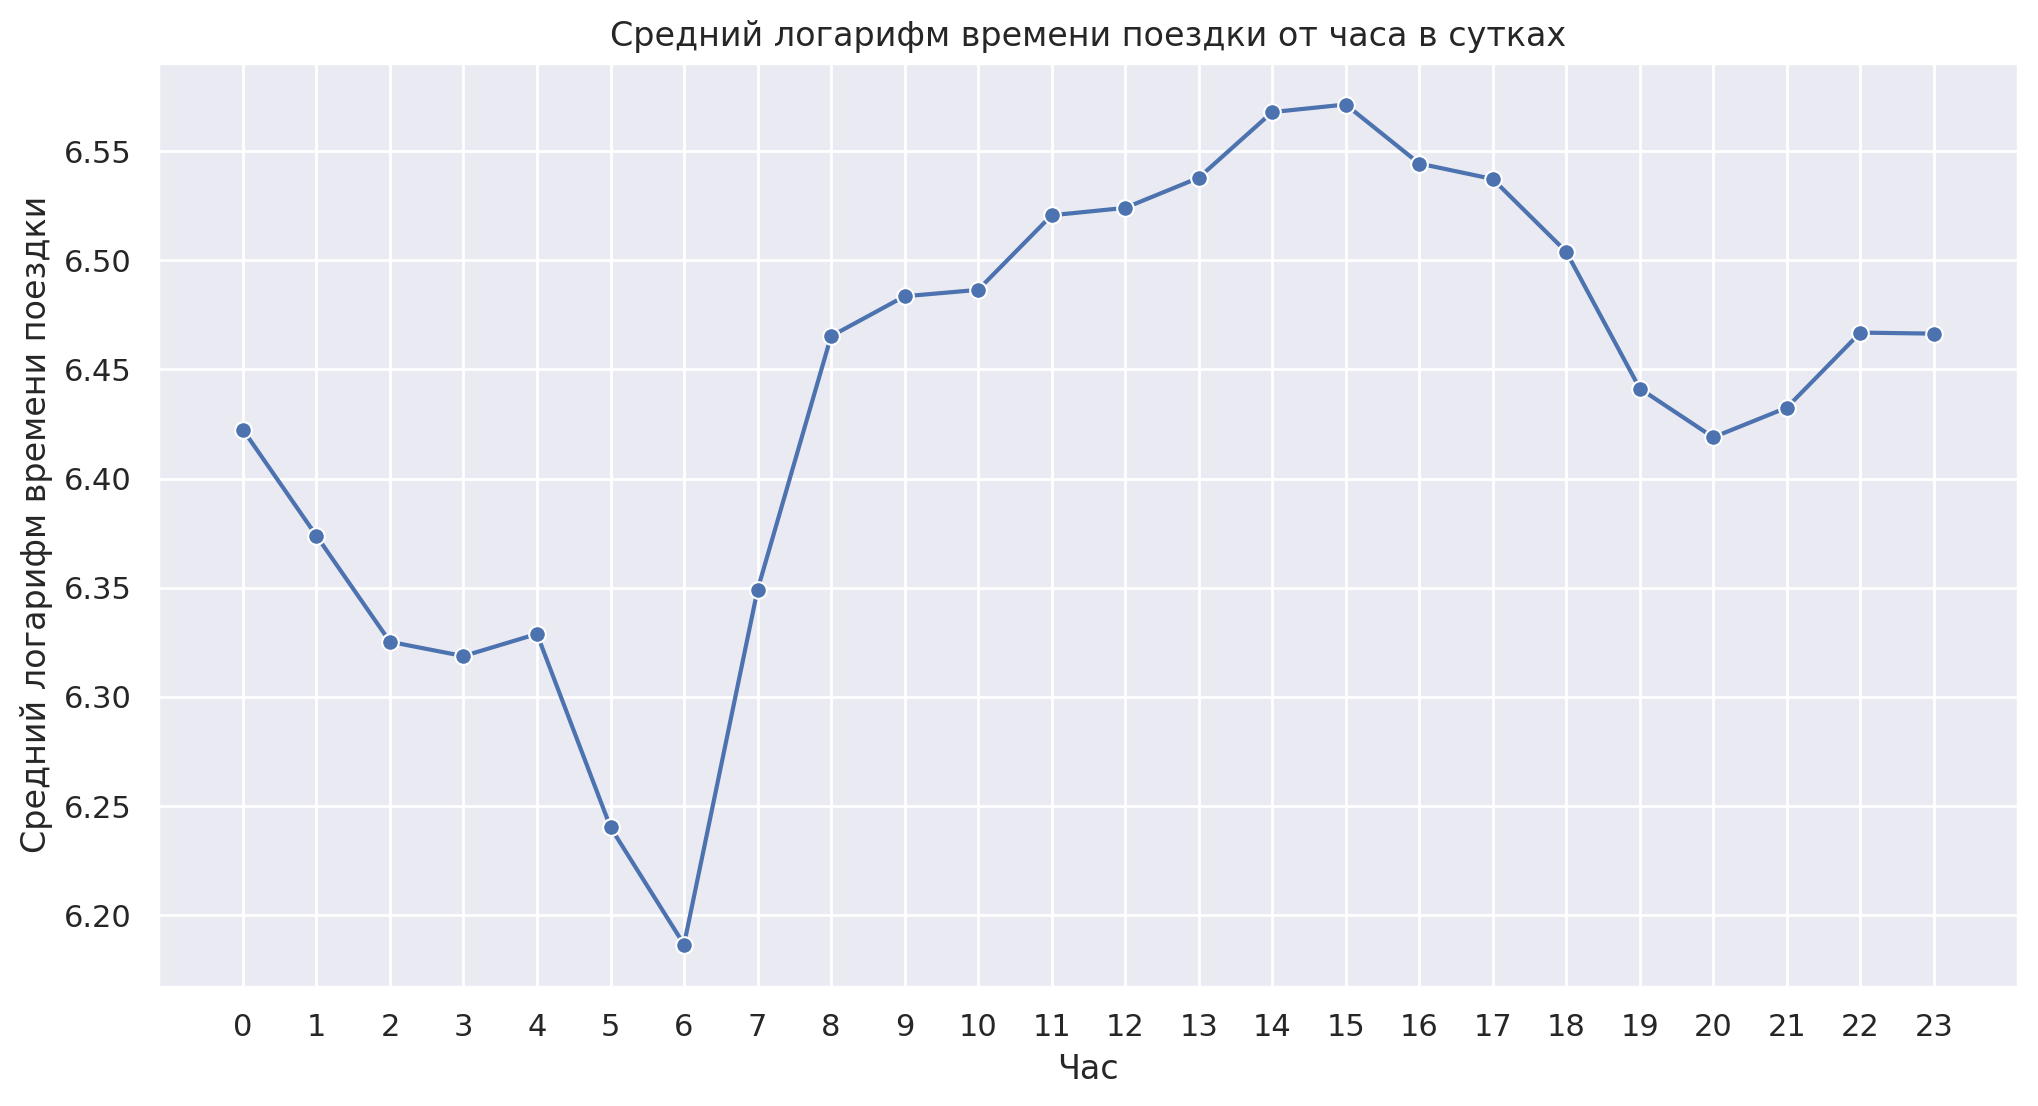

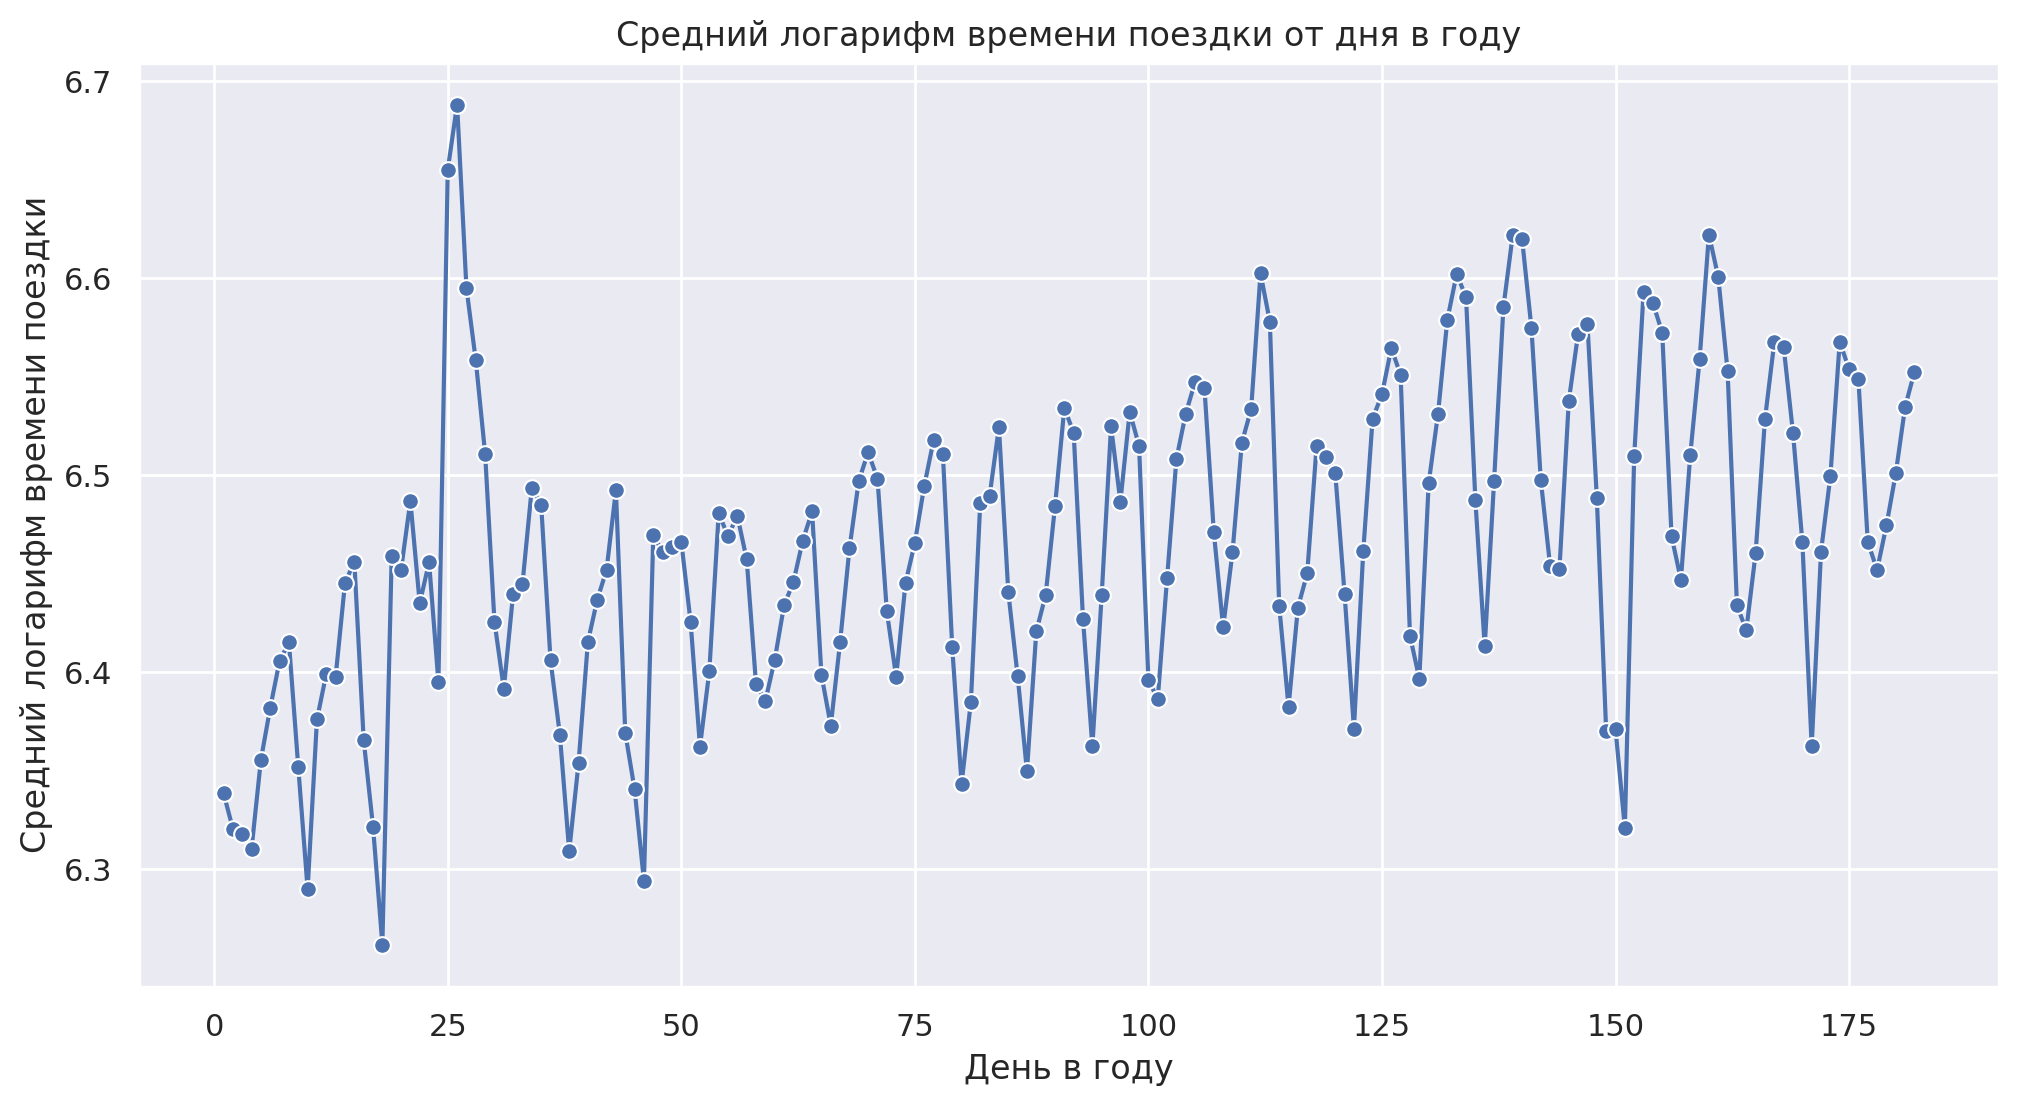

In [84]:
# 1. График зависимости среднего логарифма времени поездки от дня недели
mean_log_duration_by_weekday = df_train.groupby('day_of_week')['log_trip_duration'].mean().reset_index()

# 1. График зависимости среднего логарифма времени поездки от дня недели
# Установка порядка дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_log_duration_by_weekday = df_train.groupby('day_of_week')['log_trip_duration'].mean().reset_index()

# Убедимся, что 'day_of_week' - это категория с заданным порядком
mean_log_duration_by_weekday['day_of_week'] = pd.Categorical(mean_log_duration_by_weekday['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_log_duration_by_weekday, x='day_of_week', y='log_trip_duration', marker='o', palette='coolwarm')
plt.title('Средний логарифм времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.xticks(rotation=45)
plt.tight_layout()  # Для лучшего расположения элементов
plt.show()

# 2. График зависимости среднего логарифма времени поездки от часа в сутках
mean_log_duration_by_hour = df_train.groupby('hour')['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_log_duration_by_hour, x='hour', y='log_trip_duration', marker='o')
plt.title('Средний логарифм времени поездки от часа в сутках')
plt.xlabel('Час')
plt.ylabel('Средний логарифм времени поездки')
plt.xticks(range(24))  # Для отображения всех часов
plt.show()

# 3. График зависимости среднего логарифма времени поездки от дня в году
# Добавление колонки с днем в году
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear
mean_log_duration_by_day_of_year = df_train.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_log_duration_by_day_of_year, x='day_of_year', y='log_trip_duration', marker='o')
plt.title('Средний логарифм времени поездки от дня в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.show()

Вопрос: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости log_trip_duration от номера дня в году?

*По дням недели видим похожую зависимость по количеству поездок и по длительности - ближе к концу недели в четверг и пятницу поздок больше и они длинее из-за загруженности, в то время как в выходные поездок меньше и они короче. Также видим зависимость графиков от часа суток - то есть количество поездок и логарифм времени поездок примерно одинаково зависят от времени суток, в максимально пиковые часы загрузки возрастает и количество поездок и время из-за пробок в час пик. При этом по дням года наблюдаем интересную зависимость - в период снегопада в январе количество поездок резко упало, а логарифм их длительности резко увеличился, то есть небольшое количество людей, которые все-таки отправились в поездку в бурю, застряли в пробке или не могли долго проехать из-за снега. Изменение по дням года зависит от дня недели, видим значительную цикличность по 7 дней, при этом ближе к лету постепенно длительность поездки возрастает*

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

День недели, месяц, час и номер дня в году добавили уже ранее для построения графиков.

In [85]:
df_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration pickup_date  \
0                  N            455           6.122493  2016-03-14   
1                  N            663           6.498282  2016-06-12   
2                  N           2124           7.661527  2016-01-19   
3                  N            429           6.063785  2016-04-06   
4                  N            435           6.077642  2016-03-26   

  day_of_week  hour    month  day_of_year  
0      Monday    17    March           74  
1      Sunday     0     June          164  
2     Tuesday    11  January           19  
3   Wednesday    19    April           97  
4    Saturday    13    March           86

In [86]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Определение аномальных дат
anomalous_dates_ind = anomalous_dates.index

# Добавление бинарного признака для аномальных периодов
df_train['is_anomaly_period'] = df_train['pickup_datetime'].dt.date.isin(anomalous_dates_ind).astype(int)

# Проверка добавленных признаков
df_train[['pickup_datetime', 'day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period']].head()

pickup_datetime day_of_week    month  hour  day_of_year  \
0 2016-03-14 17:24:55      Monday    March    17           74   
1 2016-06-12 00:43:35      Sunday     June     0          164   
2 2016-01-19 11:35:24     Tuesday  January    11           19   
3 2016-04-06 19:32:31   Wednesday    April    19           97   
4 2016-03-26 13:30:55    Saturday    March    13           86   

   is_anomaly_period  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [87]:
df_train.loc[df_train['is_anomaly_period'] == 1].sample(5)

id  vendor_id     pickup_datetime  passenger_count  \
228927   id1450662          2 2016-01-24 15:00:35                1   
120089   id0846815          1 2016-01-24 15:18:27                1   
207127   id0691797          1 2016-05-30 15:37:44                1   
687512   id0838116          2 2016-01-25 13:16:02                3   
1316901  id0709085          2 2016-05-30 16:47:58                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
228927         -73.959030        40.814991         -73.969978   
120089         -73.985893        40.722721         -73.980614   
207127         -73.982117        40.775188         -73.977150   
687512         -74.003899        40.725521         -73.996681   
1316901        -73.789101        40.647209         -73.985512   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
228927          40.789558                  N            643   
120089          40.744328                  N            781   
207127          40.784611                  N            173   
687512          40.747799                  N            884   
1316901         40.759529                  N           2946   

         log_trip_duration pickup_date day_of_week  hour    month  \
228927            6.467699  2016-01-24      Sunday    15  January   
120089            6.661855  2016-01-24      Sunday    15  January   
207127            5.159055  2016-05-30      Monday    15      May   
687512            6.785588  2016-01-25      Monday    13  January   
1316901           7.988543  2016-05-30      Monday    16      May   

         day_of_year  is_anomaly_period  
228927            24                  1  
120089            24                  1  
207127           151                  1  
687512            25                  1  
1316901          151                  1

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальные признаки:
* id: уникальный идентификатор, не несет числовой информации.
* vendor_id: идентификатор поставщика, представляет собой категорию (например, разные такси).
* store_and_fwd_flag: бинарный признак, указывающий, была ли поездка сохранена или нет (значения "Y" и "N").
* day_of_week: день недели, представляющий категорию (например, "Monday", "Tuesday" и т.д.).
* month: месяц года, также категориальный признак.

Численные признаки:
* pickup_datetime: временной признак, может быть преобразован в числовые (например, количество секунд с начала эпохи), но чаще рассматривается как временной.
* passenger_count: количество пассажиров, числовой признак.
* pickup_longitude: географическая координата, числовой признак.
* pickup_latitude: географическая координата, числовой признак.
* dropoff_longitude: географическая координата, числовой признак.
* dropoff_latitude: географическая координата, числовой признак.
* log_trip_duration: логарифм времени поездки, числовой признак.
* hour: час суток, числовой признак (можно рассматривать как категориальный в контексте определенных анализов).
* day_of_year: номер дня в году, числовой признак.
* is_anomaly_period: бинарный признак (0 или 1), также рассматривается как числовой.


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [88]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train, test_size=0.3, random_state=42)

# Выделяем нужные признаки
X_train = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period']]
y_train = train['log_trip_duration']  # Целевая переменная

X_test = test[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period']]
y_test = test['log_trip_duration']  # Целевая переменная

# Создаем трансформер для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['hour', 'day_of_year',
                                     'is_anomaly_period']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['day_of_week', 'month'])
    ])

# Создаем пайплайн для обучения модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказания для обучающего набора данных
y_pred = pipeline.predict(X_test)

# Вычисление RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Вывод результата
print(f'RMSLE: {rmsle}')


RMSLE: 0.11263471646475191


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [89]:
from typing import Iterable
from typing import Union

def show_circles_on_map(
    latitude_values: Union[np.ndarray, list],
    longitude_values: Union[np.ndarray, list],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import numpy as np

def get_latitudes_and_longitudes(df_train, sample_size=1000):
    # Случайный выбор строк
    sample_df = df_train.sample(sample_size)

    # Получаем координаты
    latitudes = sample_df['pickup_latitude'].values
    longitudes = sample_df['pickup_longitude'].values

    return latitudes, longitudes

# Вызов функции для получения координат
latitudes, longitudes = get_latitudes_and_longitudes(train)

show_circles_on_map(latitudes, longitudes)

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

*Мы видим скопление точек вдали от остновного разброса недалеко от аэропортов, эта информация может пригодиться нам далее, тк поездки на такси в аэропорт сильно отличаются от обычных поездок внутри города по длительности, расстоянию и времени ожидания машины. Также для аэропортов будут немного другие закономерности по распределению количества поездок по дням недели и по часам.*

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [91]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df_train.loc[:, 'haversine'] = haversine_array(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, df_train['dropoff_latitude'].values, df_train['dropoff_longitude'].values)


In [92]:
df_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration pickup_date  \
0                  N            455           6.122493  2016-03-14   
1                  N            663           6.498282  2016-06-12   
2                  N           2124           7.661527  2016-01-19   
3                  N            429           6.063785  2016-04-06   
4                  N            435           6.077642  2016-03-26   

  day_of_week  hour    month  day_of_year  is_anomaly_period  haversine  
0      Monday    17    March           74                  0   1.498521  
1      Sunday     0     June          164                  0   1.805507  
2     Tuesday    11  January           19                  0   6.385098  
3   Wednesday    19    April           97                  0   1.485498  
4    Saturday    13    March           86                  0   1.188588

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [93]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_haversine'] = np.where(df_train['haversine'] > 0,
                                   np.log(df_train['haversine']),
                                   0)
df_train.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration pickup_date  \
0                  N            455           6.122493  2016-03-14   
1                  N            663           6.498282  2016-06-12   
2                  N           2124           7.661527  2016-01-19   
3                  N            429           6.063785  2016-04-06   
4                  N            435           6.077642  2016-03-26   

  day_of_week  hour    month  day_of_year  is_anomaly_period  haversine  \
0      Monday    17    March           74                  0   1.498521   
1      Sunday     0     June          164                  0   1.805507   
2     Tuesday    11  January           19                  0   6.385098   
3   Wednesday    19    April           97                  0   1.485498   
4    Saturday    13    March           86                  0   1.188588   

   log_haversine  
0       0.404478  
1       0.590842  
2       1.853967  
3       0.395750  
4       0.172766

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [94]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Рассчитываем корреляцию
correlation_distance = df_train['haversine'].corr(df_train['log_trip_duration'])
correlation_log_distance = df_train['log_haversine'].corr(df_train['log_trip_duration'])

print(f"Корреляция расстояния (haversine) с log_trip_duration: {correlation_distance:.4f}")
print(f"Корреляция логарифма расстояния (log_haversine) с log_trip_duration: {correlation_log_distance:.4f}")

# Сравнение корреляций
if correlation_log_distance > correlation_distance:
    print("Логарифм расстояния лучше отражает таргет.")
else:
    print("Обычное расстояние лучше отражает таргет.")


Корреляция расстояния (haversine) с log_trip_duration: 0.5736
Корреляция логарифма расстояния (log_haversine) с log_trip_duration: 0.7647
Логарифм расстояния лучше отражает таргет.


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

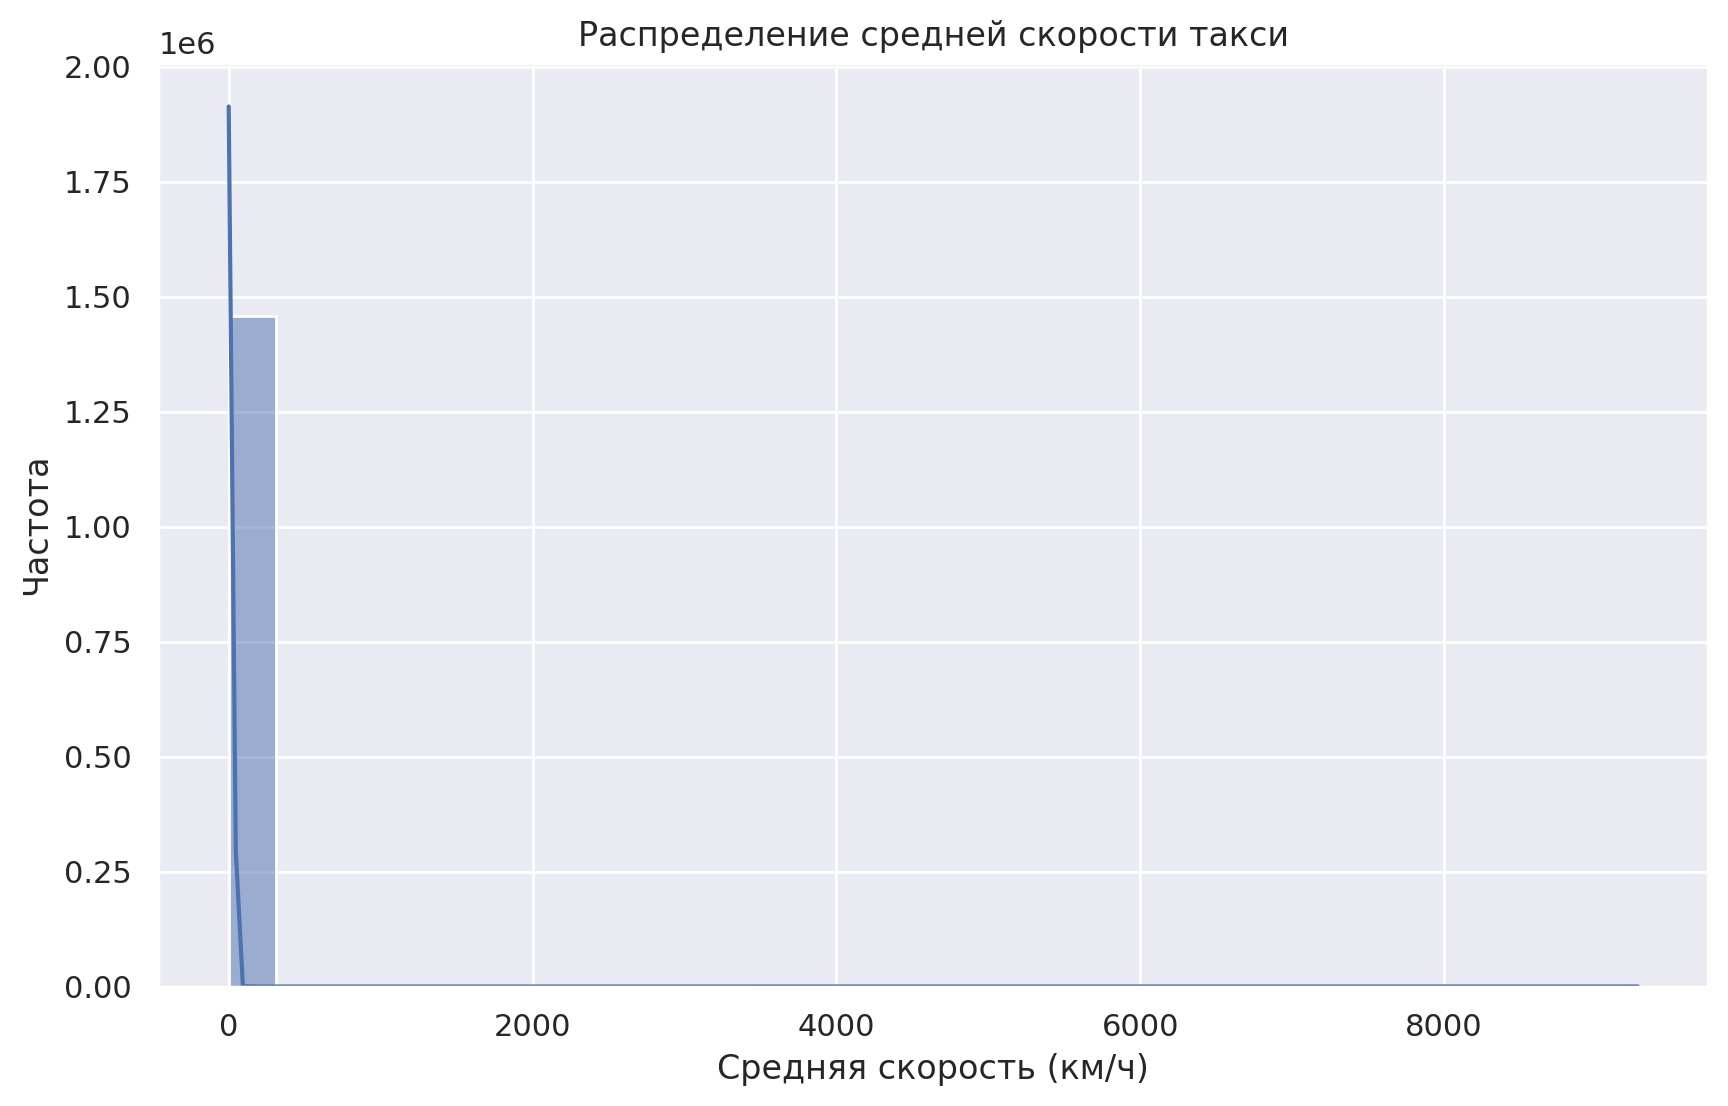

In [95]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Рассчитываем среднюю скорость
df_train['average_speed'] = df_train['haversine'] / df_train['trip_duration'] *3600

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df_train['average_speed'], bins=30, kde=True)
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

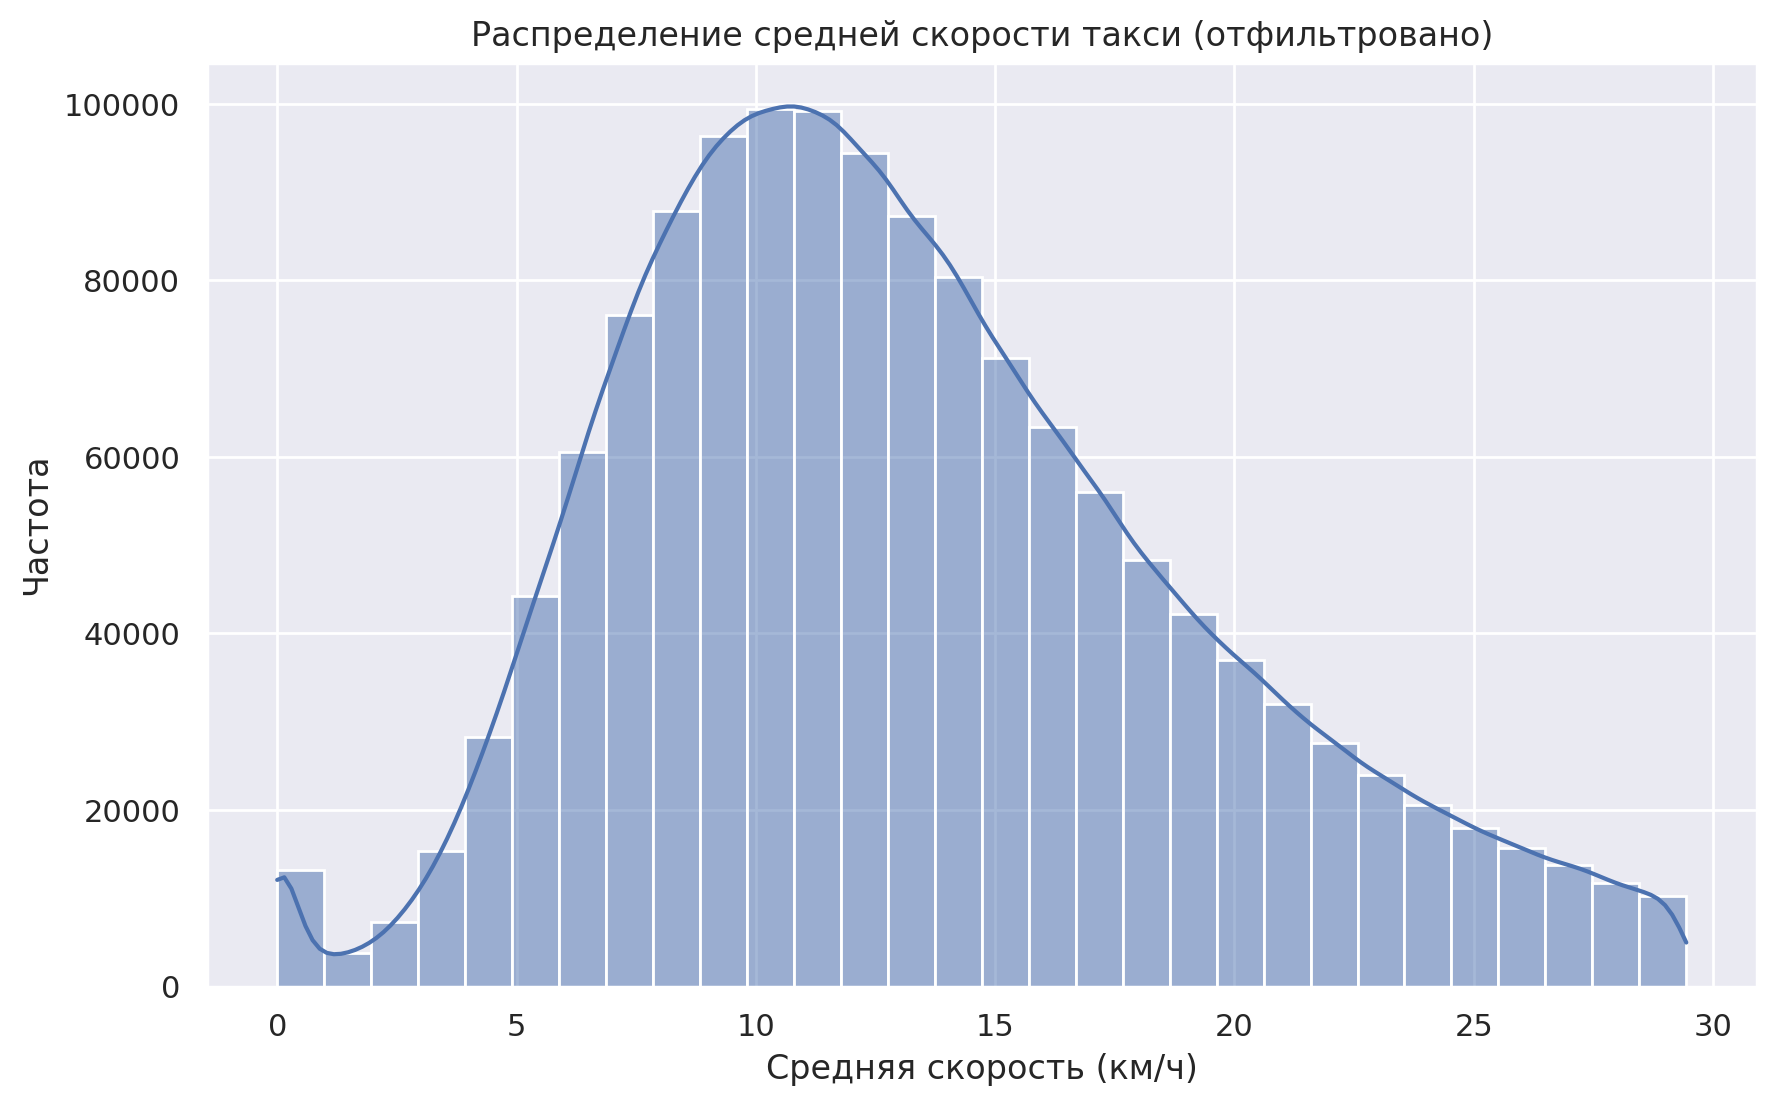

In [96]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Определяем порог (например, 95-й процентиль)
threshold = df_train['average_speed'].quantile(0.95)

# Фильтруем данные
filtered_data = df_train[df_train['average_speed'] <= threshold]

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['average_speed'], bins=30, kde=True)
plt.title('Распределение средней скорости такси (отфильтровано)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-97-077a98b50497>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_speeds = df_train.groupby(['day_of_week', 'hour'])['average_speed'].median().unstack()


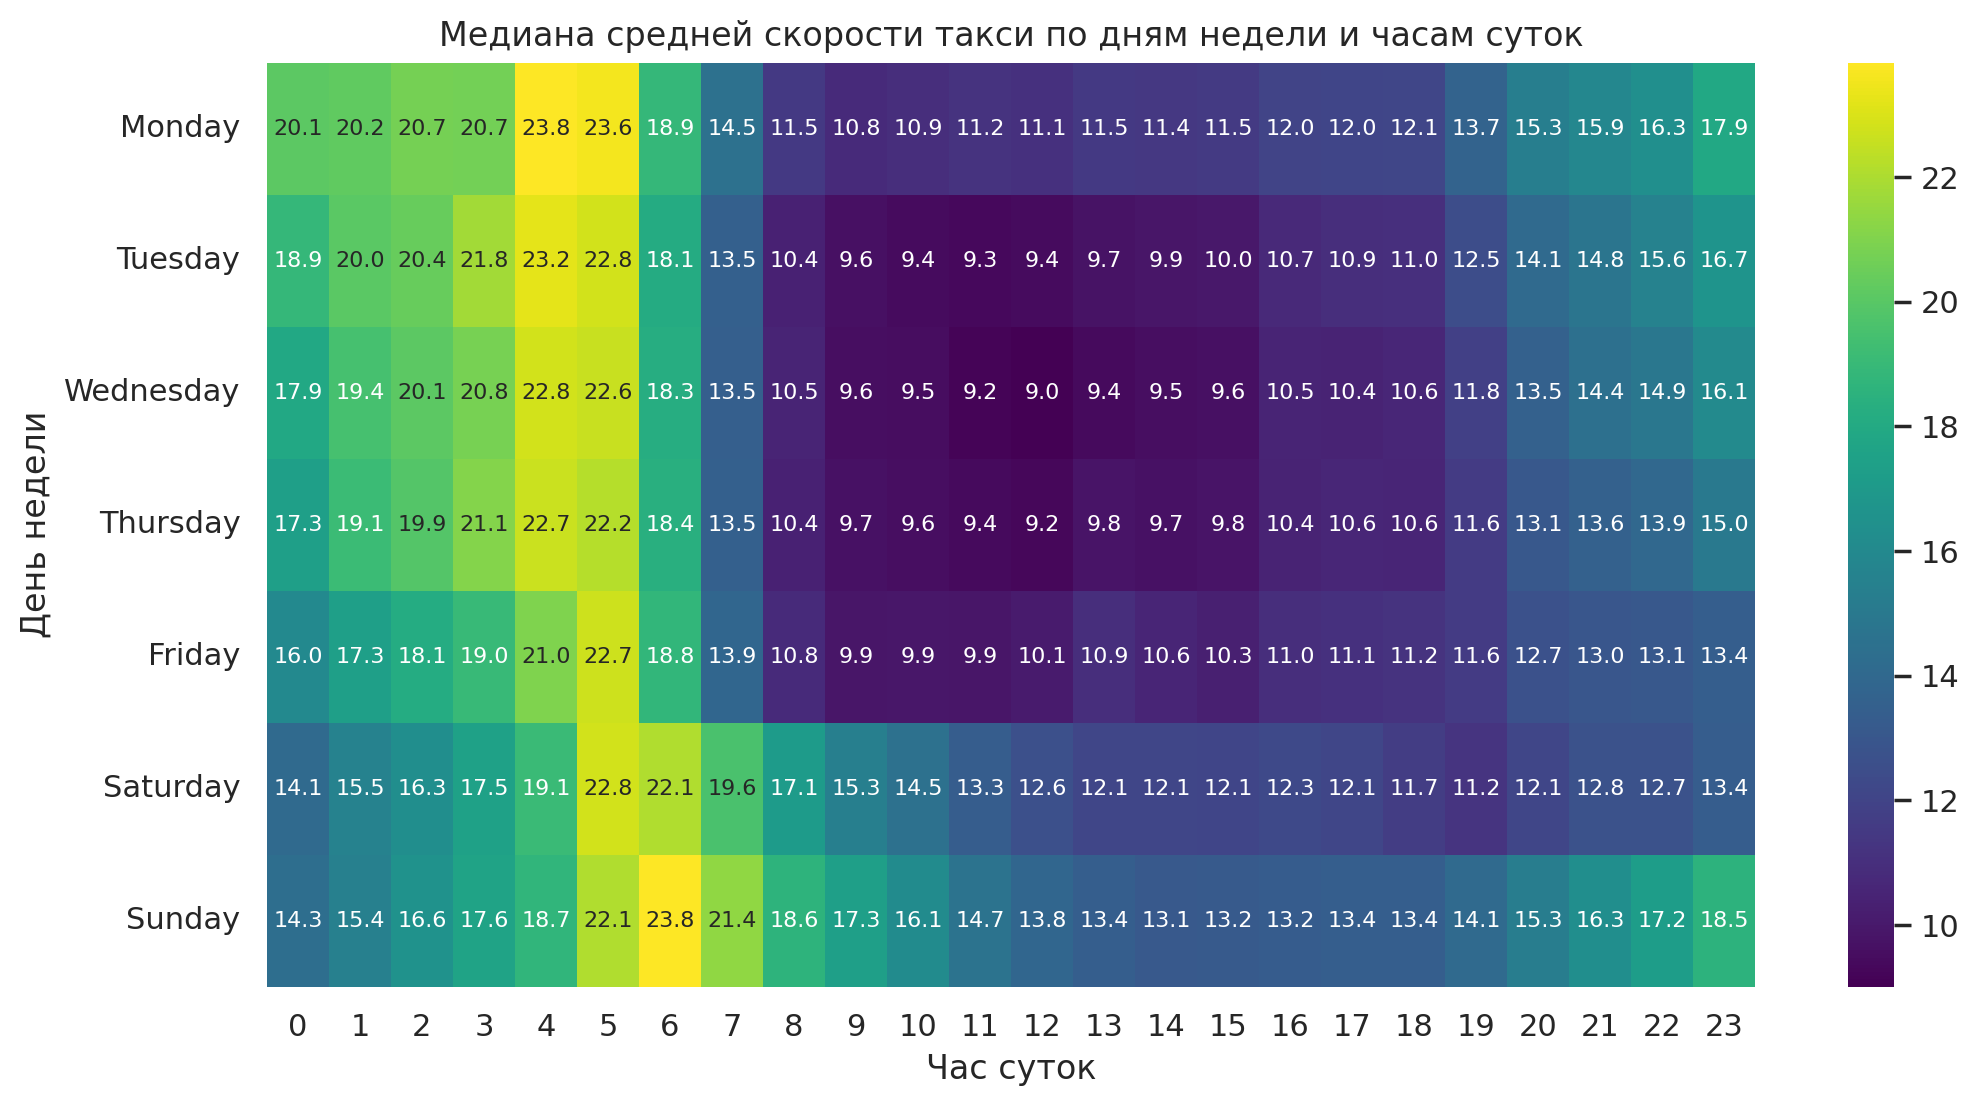

In [97]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Убедимся, что колонки 'day_of_week' и 'hour' имеют правильные типы
df_train['day_of_week'] = pd.Categorical(df_train['day_of_week'],
                                       categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                       ordered=True)

# Сгруппируем данные и рассчитаем медиану
median_speeds = df_train.groupby(['day_of_week', 'hour'])['average_speed'].median().unstack()

# Построение heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(median_speeds, cmap='viridis', annot=True, fmt=".1f", annot_kws={"size": 8})
plt.title('Медиана средней скорости такси по дням недели и часам суток')
plt.xlabel('Час суток')
plt.ylabel('День недели')
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

*Потому что эта колонка была выведена из двух других - расстояния и времени, модель во время обучения и так будет обучаться на исходных данных, а добавив новые колонки мы можем спровоцировать мультиколлинеарность. Скорость нужна только нам для понимания и визуализации.*

In [98]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train = df_train.drop(columns=['average_speed'])
print(df_train.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'pickup_date', 'day_of_week', 'hour', 'month',
       'day_of_year', 'is_anomaly_period', 'haversine', 'log_haversine'],
      dtype='object')


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Наибольшая скорость наблюдается в период наименьшего трафика - ночью и в утренние часы, наименьшая скорость - в середине дня и в середине недели, видимо в эти часы наблюдаются наибольшие пробки.

In [99]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Функция для определения, попадает ли поездка в период пробок
def is_traffic_period(row):
    if row['day_of_week'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        if 7 <= row['hour'] < 19:  # Утренние и вечерние часы пик
            return 1  # Период пробок
    return 0  # Свободные дороги

# Функция для определения, попадает ли поездка в период свободных дорог
def is_free_road_period(row):
    if row['day_of_week'] in ['Saturday', 'Sunday']:
        return 1  # Выходные дни — свободные дороги
    if row['hour'] < 6 or row['hour'] >= 22:  # Ночные часы
        return 1  # Свободные дороги
    return 0  # Период пробок

# Применяем функции к DataFrame
df_train['in_traffic_period'] = df_train.apply(is_traffic_period, axis=1)
df_train['in_free_road_period'] = df_train.apply(is_free_road_period, axis=1)

# Проверяем новые признаки
print(df_train[['in_traffic_period', 'in_free_road_period']].head())


   in_traffic_period  in_free_road_period
0                  1                    0
1                  0                    1
2                  1                    0
3                  0                    0
4                  0                    1


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [100]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Координаты аэропортов Нью-Йорка
airports = {
    'JFK': (40.6413, -73.7781),  # John F. Kennedy International Airport
    'LGA': (40.7769, -73.8739),  # New York LaGuardia International Airport
    'EWR': (40.6895, -74.1745)   # Newark Liberty International Airport
}

# Функция для вычисления расстояния между двумя точками по координатам
def haversine(lat1, lon1, lat2, lon2):
    # Конвертация градусов в радианы
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Радиус Земли в километрах
    return r * c

# Функция для проверки, начинается ли или заканчивается поездка в аэропорту
def check_airport(row, airports, threshold=1.0):
    pickup_lat, pickup_lon = row['pickup_latitude'], row['pickup_longitude']
    dropoff_lat, dropoff_lon = row['dropoff_latitude'], row['dropoff_longitude']

    pickup_in_airport = any(haversine(pickup_lat, pickup_lon, lat, lon) < threshold for lat, lon in airports.values())
    dropoff_in_airport = any(haversine(dropoff_lat, dropoff_lon, lat, lon) < threshold for lat, lon in airports.values())

    return pd.Series([pickup_in_airport, dropoff_in_airport])

# Применяем функцию к DataFrame
df_train[['in_airport_pickup', 'in_airport_dropoff']] = df_train.apply(check_airport, axis=1, airports=airports)

# Проверяем новые признаки
df_train[['in_airport_pickup', 'in_airport_dropoff']].head()

in_airport_pickup  in_airport_dropoff
0              False               False
1              False               False
2              False               False
3              False               False
4              False               False

*Эти признаки могут быть полезны, так как поездки в аэропорт и из аэропорта обладают выделяющимися закономерностями, например, они в меньшей степени зависят от рабочей недели, эти поездки обычно дольше и на дальние расстояния, а также скорость автомобиля скорее всего выше в таких поездках, тк за городом меньше трафик. Наверное, разумно в дальнейшем эти данные либо удалить, либо изучить отдельно от остальной выборки.*

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

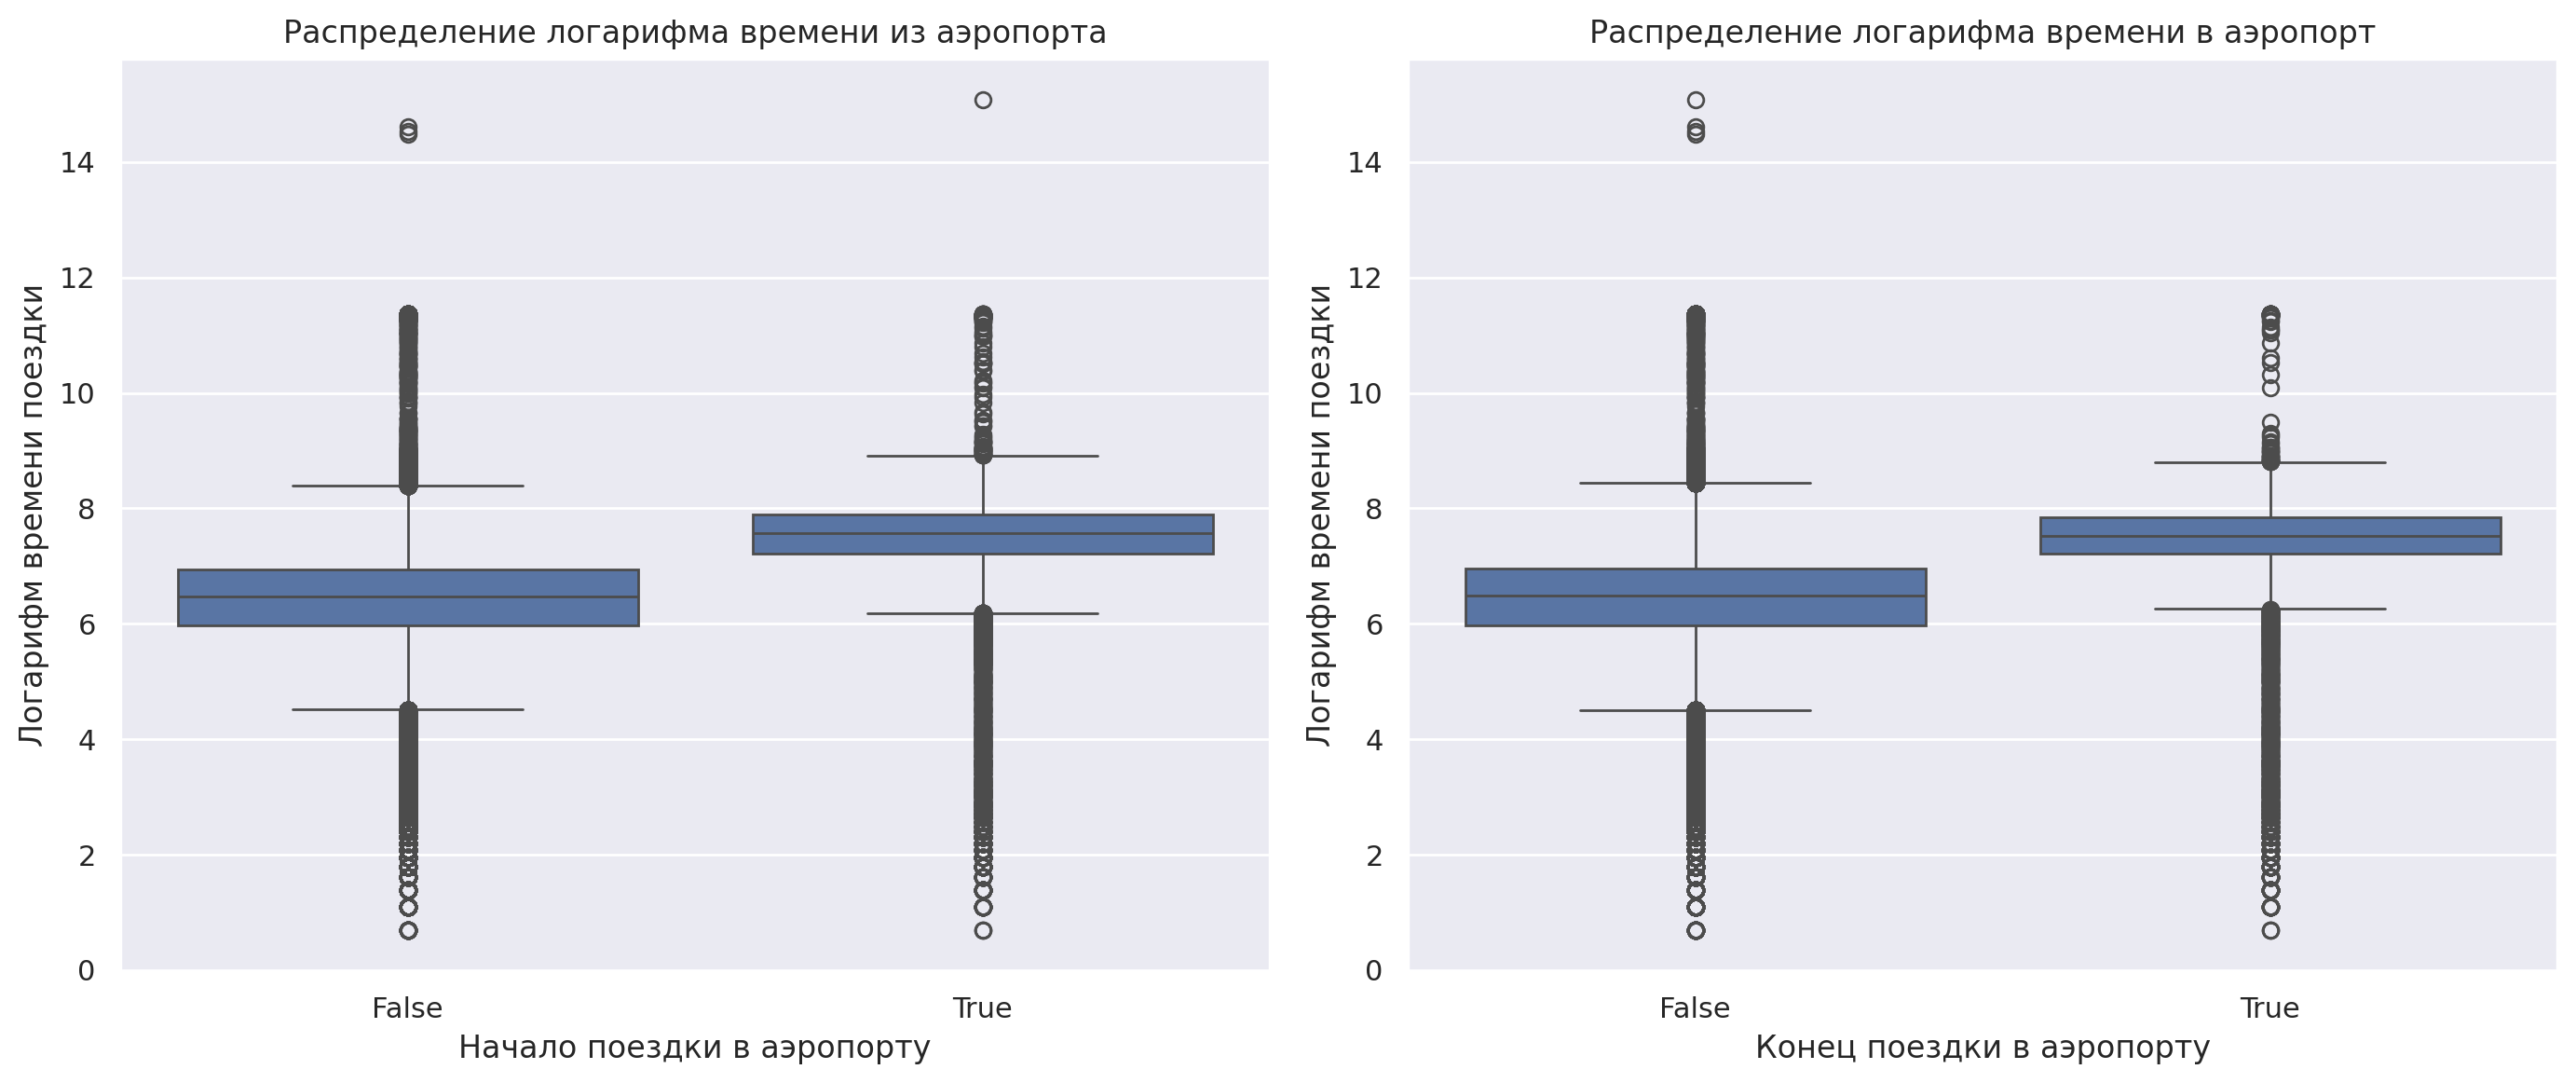

In [101]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Настройка графиков
plt.figure(figsize=(14, 6))

# Ящик с усами для поездок, начинающихся в аэропорту
plt.subplot(1, 2, 1)
sns.boxplot(x='in_airport_pickup', y='log_trip_duration', data=df_train)
plt.title('Распределение логарифма времени из аэропорта')
plt.xlabel('Начало поездки в аэропорту')
plt.ylabel('Логарифм времени поездки')

# Ящик с усами для поездок, заканчивающихся в аэропорту
plt.subplot(1, 2, 2)
sns.boxplot(x='in_airport_dropoff', y='log_trip_duration', data=df_train)
plt.title('Распределение логарифма времени в аэропорт')
plt.xlabel('Конец поездки в аэропорту')
plt.ylabel('Логарифм времени поездки')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

*Да, видим явное отклонение средних значений для поездок в и из аэропорта, эти поездки добавляли бы в наш датасет лишний шум, но тк мы поняли причину отклонения, сможем отдельно обработать эти поездки.*

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows  # Количество строк
        self.n_cols = n_cols  # Количество столбцов
        self.cell_width = None
        self.cell_height = None
        self.min_latitude = None
        self.max_latitude = None
        self.min_longitude = None
        self.max_longitude = None

    def fit(self, X=None, y=None):
        # Исключаем поездки, связанные с аэропортами
        X_filtered = X[~(X['in_airport_pickup'] | X['in_airport_dropoff'])]

        # Определяем границы области с 95% поездок
        lower_lat = X_filtered['pickup_latitude'].quantile(0.025)
        upper_lat = X_filtered['pickup_latitude'].quantile(0.975)
        lower_lon = X_filtered['pickup_longitude'].quantile(0.025)
        upper_lon = X_filtered['pickup_longitude'].quantile(0.975)

        self.min_latitude = lower_lat
        self.max_latitude = upper_lat
        self.min_longitude = lower_lon
        self.max_longitude = upper_lon

        # Вычисляем ширину и высоту ячейки
        lat_range = self.max_latitude - self.min_latitude
        lon_range = self.max_longitude - self.min_longitude

        # Устанавливаем размеры ячеек для равномерного распределения
        self.cell_width = lon_range / self.n_cols
        self.cell_height = lat_range / self.n_rows

        return self

    def transform(self, X, y=None):
        # Создаем новые признаки для начала и конца поездки
        pickup_cell = self._get_cell_number(X['pickup_latitude'], X['pickup_longitude'])
        dropoff_cell = self._get_cell_number(X['dropoff_latitude'], X['dropoff_longitude'])

        return pd.DataFrame({
            'pickup_cell': pickup_cell,
            'dropoff_cell': dropoff_cell
        })

    def _get_cell_number(self, latitudes, longitudes):
        # Вычисляем номер ячейки
        row_indices = ((latitudes - self.min_latitude) / self.cell_height).astype(int)
        col_indices = ((longitudes - self.min_longitude) / self.cell_width).astype(int)

        # Условия для проверки границ
        row_indices = np.clip(row_indices, 0, self.n_rows - 1)
        col_indices = np.clip(col_indices, 0, self.n_cols - 1)

        # Присваиваем номер ячейки, или -1 если не попадает в область
        cell_numbers = row_indices * self.n_cols + col_indices
        out_of_bounds = (latitudes < self.min_latitude) | (latitudes > self.max_latitude) | \
                        (longitudes < self.min_longitude) | (longitudes > self.max_longitude)

        cell_numbers[out_of_bounds] = -1

        return cell_numbers

    def show_map(self):
        # Создаем карту с использованием folium
        m = folium.Map(location=[(self.min_latitude + self.max_latitude) / 2,
                                  (self.min_longitude + self.max_longitude) / 2],
                       zoom_start=12)

        # Добавляем ячейки на карту
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                lat_bottom = self.min_latitude + i * self.cell_height
                lat_top = self.min_latitude + (i + 1) * self.cell_height
                lon_left = self.min_longitude + j * self.cell_width
                lon_right = self.min_longitude + (j + 1) * self.cell_width

                # Создаем прямоугольник и добавляем его на карту
                folium.Rectangle(
                    bounds=[[lat_bottom, lon_left], [lat_top, lon_right]],
                    color='blue',
                    fill=True,
                    fill_opacity=0.3,
                    weight=1
                ).add_to(m)

        # Отображаем карту
        return m

# Пример использования
# Предположим, train - ваш DataFrame с колонками 'pickup_latitude' и 'pickup_longitude'
transformer = MapGridTransformer(n_rows=4, n_cols=3)  # Задаем 4 строки и 3 столбца
transformer.fit(df_train)

# Получение новых признаков
new_features = transformer.transform(df_train)
df_train = pd.concat([df_train, new_features], axis=1)

# Визуализация ячеек
map_with_cells = transformer.show_map()
map_with_cells.save('map_with_cells.html')
map_with_cells  # Отобразите карту в Jupyter Notebook или сохраните в HTML


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [103]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df_train, test_size=0.3, random_state=42)

# Выделяем нужные признаки
X_train = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell']]
y_train = train['log_trip_duration']  # Целевая переменная

X_test = test[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell']]
y_test = test['log_trip_duration']  # Целевая переменная

# Определим числовые и категориальные признаки
numeric_features = ['in_traffic_period', 'in_free_road_period',
                    'pickup_cell', 'dropoff_cell','hour', 'day_of_year',
                                     'is_anomaly_period']
categorical_features = ['in_airport_pickup', 'in_airport_dropoff','day_of_week', 'month']

# Создадим предварительную обработку данных с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Создадим пол pipeline для модели Ridge
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Обучим модель на всех данных
model.fit(X_train, y_train)

# Предсказания для обучающего набора данных
y_pred = model.predict(X_test)

# Вычисление RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Вывод результата
print(f'RMSLE: {rmsle}')

RMSLE: 0.10745504925604463


Ура, RMSLE стал немного меньше после наших страданий)))

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

* **vendor_id**:
Описание: Этот признак указывает на компанию-поставщика такси (например, разные компании могут иметь разные тарифы или маршруты).
Потенциальная полезность: Разные компании могут иметь разные стили обслуживания, качество автомобилей, а также различные стратегии работы в определенное время суток. Это может повлиять на время поездки, особенно в зависимости от района города.
* **passenger_count**:
Описание: Этот признак указывает на количество пассажиров в поездке.
Потенциальная полезность: Количество пассажиров может повлиять на скорость поездки (например, большее количество пассажиров может замедлить процесс посадки и высадки). Кроме того, различные пассажиры могут требовать разные уровни обслуживания, что также может повлиять на время в пути.
* **store_and_fwd_flag**:
Описание: Этот признак указывает на то, была ли поездка записана в режиме хранения и передачи (например, когда связь с сервером потеряна).
Потенциальная полезность: Если поездка была в режиме хранения, это может означать, что поездка была завершена в условиях плохой связи, что может быть связано с конкретными маршрутами или участками дороги, потенциально увеличивающими время в пути.

In [104]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Подсчет уникальных значений
unique_vendor_ids = df_train['vendor_id'].nunique()
unique_passenger_counts = df_train['passenger_count'].nunique()
unique_store_and_fwd_flags = df_train['store_and_fwd_flag'].nunique()

# Вывод уникальных значений
print(f'Unique vendor_id values: {unique_vendor_ids}')
print(f'Unique passenger_count values: {unique_passenger_counts}')
print(f'Unique store_and_fwd_flag values: {unique_store_and_fwd_flags}')

Unique vendor_id values: 2
Unique passenger_count values: 10
Unique store_and_fwd_flag values: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

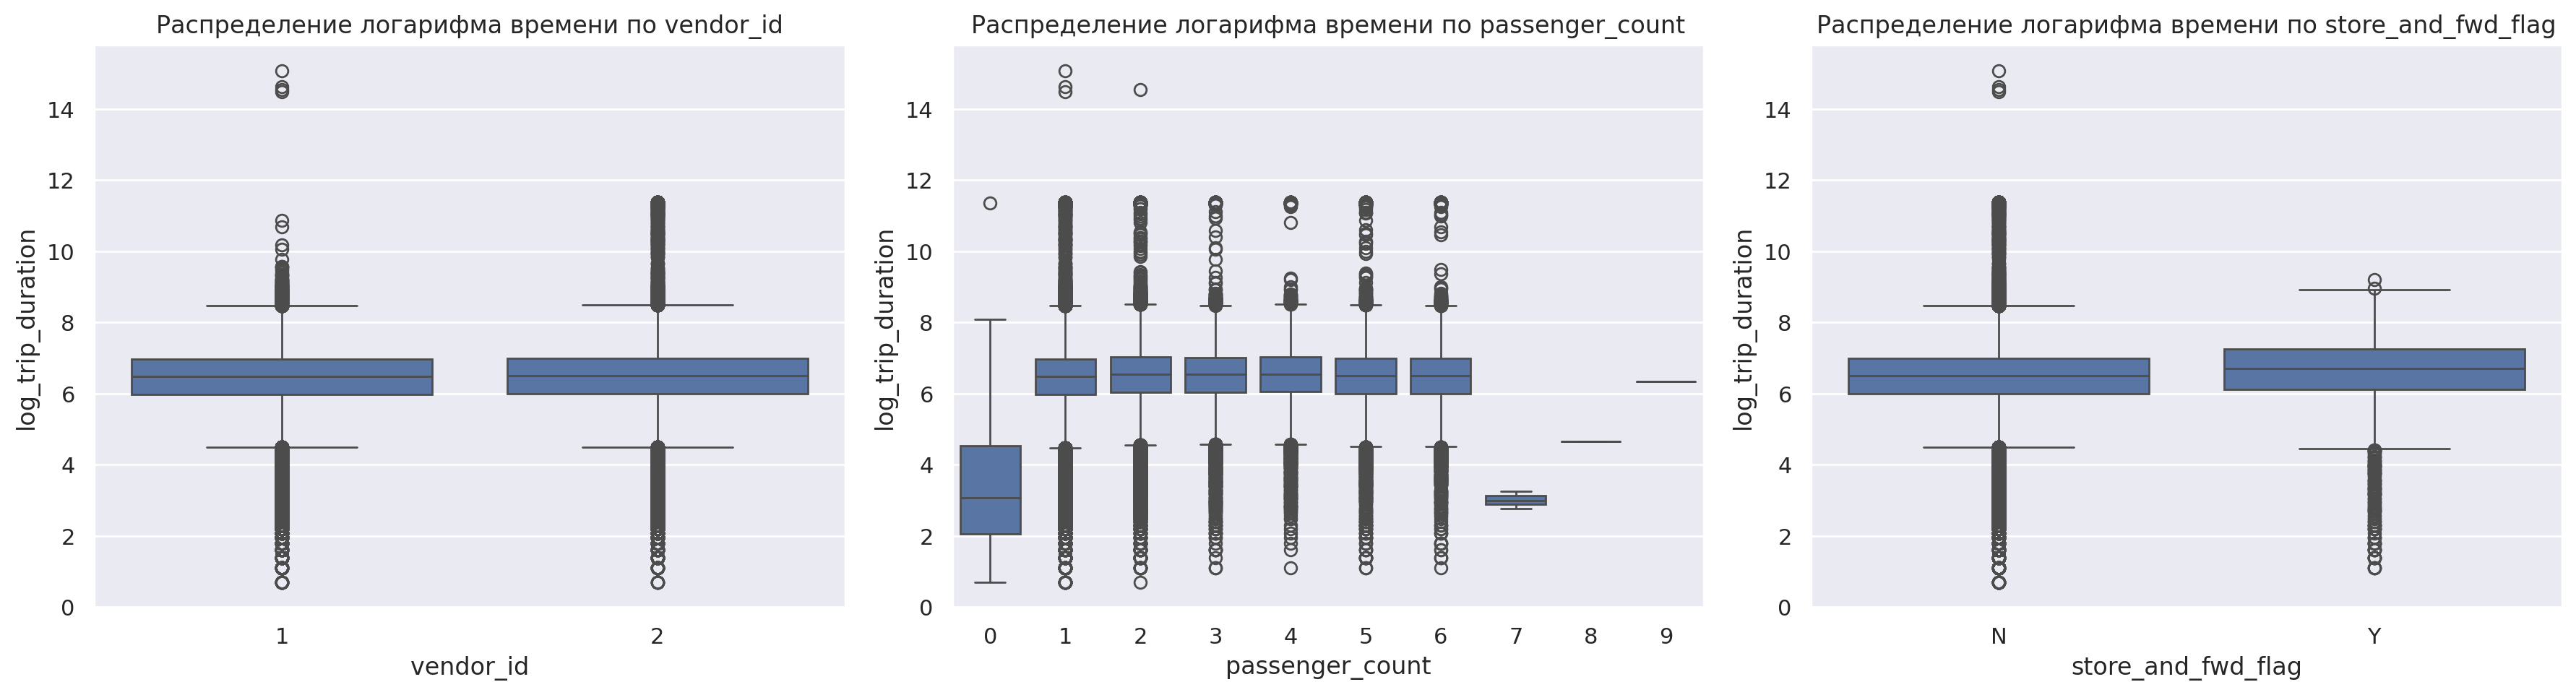

In [105]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Настройка графиков
plt.figure(figsize=(18, 5))

# Boxplot для vendor_id
plt.subplot(1, 3, 1)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df_train)
plt.title('Распределение логарифма времени по vendor_id')
plt.xlabel('vendor_id')
plt.ylabel('log_trip_duration')

# Boxplot для passenger_count
plt.subplot(1, 3, 2)
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df_train)
plt.title('Распределение логарифма времени по passenger_count')
plt.xlabel('passenger_count')

# Boxplot для store_and_fwd_flag
plt.subplot(1, 3, 3)
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df_train)
plt.title('Распределение логарифма времени по store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')

# Отображение графиков
plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [106]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['vendor_id'] = df_train['vendor_id'].map({1: 0, 2: 1})

train['store_and_fwd_flag'] = df_train['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

print(df_train[['vendor_id', 'store_and_fwd_flag']].head())

   vendor_id store_and_fwd_flag
0          1                  N
1          0                  N
2          1                  N
3          1                  N
4          1                  N


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

*По признаку vendor_id не наблюдается сильной зависимости, а вот по признакам passenger_count мы видим существенную зависимость - поездки очень короткие и с большим разбросом для количества пасажиров 0, возможно там хранятся ошибки или отказы от поездок, эти строки можем обработать отдельно, также наблюдаем странный разброс для поездок с 7 и более пассажирами. По признаку store_and_fwd_flag видим, что в случае потери связи с сервером дисперсия времени поездки возрастает, возможно поездки в снежную бурю как раз попали в этот признак.*

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [107]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df_train, test_size=0.3, random_state=42)

# Выделяем нужные признаки
X_train = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag','log_haversine']]
y_train = train['log_trip_duration']  # Целевая переменная

X_test = test[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag','log_haversine']]
y_test = test['log_trip_duration']  # Целевая переменная

# Определим числовые и категориальные признаки
numeric_features = ['in_traffic_period', 'in_free_road_period',
                    'pickup_cell', 'dropoff_cell','hour', 'day_of_year',
                                     'is_anomaly_period','passenger_count']
categorical_features = ['in_airport_pickup', 'in_airport_dropoff','day_of_week', 'month','vendor_id', 'store_and_fwd_flag']

# Создадим предварительную обработку данных с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Создадим пол pipeline для модели Ridge
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Обучим модель на всех данных
model.fit(X_train, y_train)

# Предсказания для обучающего набора данных
y_pred = model.predict(X_test)

# Вычисление RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Вывод результата
print(f'RMSLE: {rmsle}')

RMSLE: 0.10741602502008148


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

*Показатель снизился на 4/10^4 - незначильно, вероятно, можем не использовать эти признаки для обучения.*

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

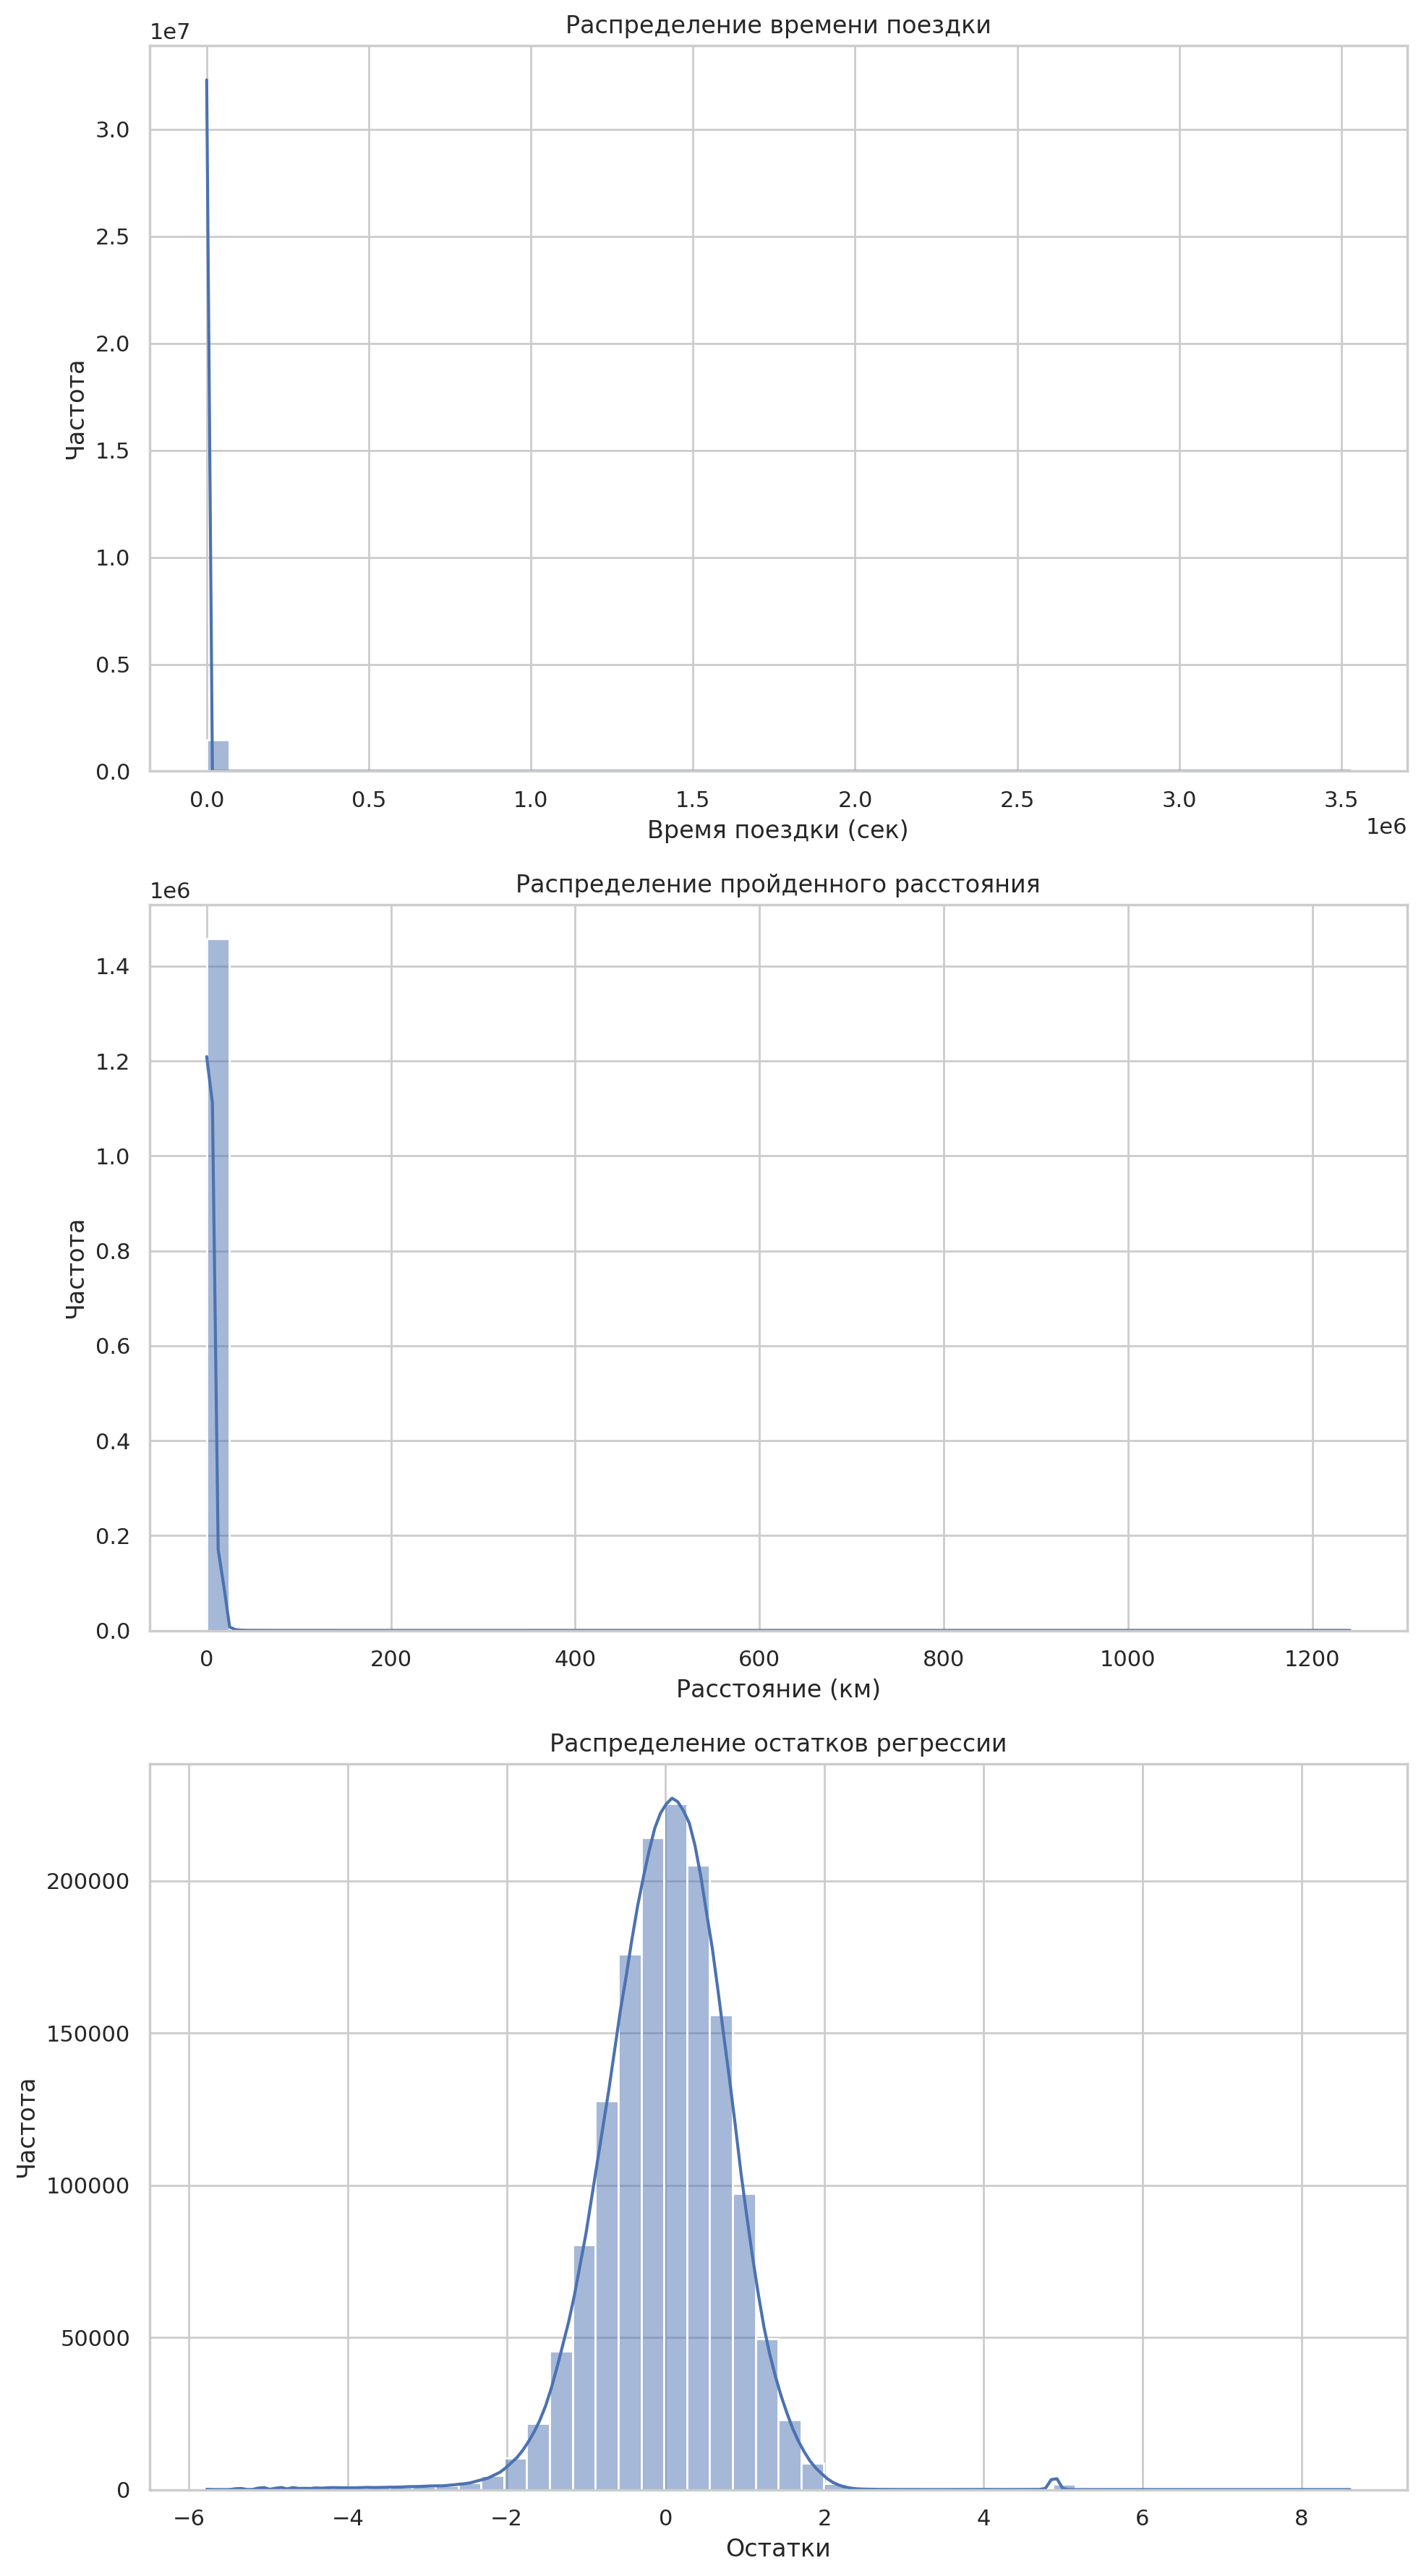

In [108]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Настройка стиля графиков
sns.set(style="whitegrid")

# Построение гистограмм
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Гистограмма времени поездки
sns.histplot(df_train['trip_duration'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Распределение времени поездки')
axes[0].set_xlabel('Время поездки (сек)')
axes[0].set_ylabel('Частота')

# Гистограмма пройденного расстояния
sns.histplot(df_train['haversine'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Распределение пройденного расстояния')
axes[1].set_xlabel('Расстояние (км)')
axes[1].set_ylabel('Частота')

# Гистограмма остатков регрессии
# Предположим, что у вас есть переменная `residuals` для остатков
sns.histplot(df_train['log_trip_duration'] - df_train['log_trip_duration'].mean(), bins=50, kde=True, ax=axes[2])
axes[2].set_title('Распределение остатков регрессии')
axes[2].set_xlabel('Остатки')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [109]:
# Определяем пороги
trip_duration_threshold = 3000  # секунд
haversine_threshold = 30  # км
residuals_threshold = 2  # пример, зависит от распределения остатков

# Фильтрация данных
filtered_train = train[
    (train['trip_duration'] <= trip_duration_threshold) &
    (train['haversine'] <= haversine_threshold) &
    (abs(train['log_trip_duration'] - train['log_trip_duration'].mean()) <= residuals_threshold)
]

# Проверка результата
print("Исходный размер данных:", train.shape)
print("Размер после фильтрации:", filtered_train.shape)


Исходный размер данных: (1021050, 25)
Размер после фильтрации: (993952, 25)


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [110]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Определяем порог редкости (например, 1%)
threshold = 0.05

# Список категориальных признаков
categorical_features = ['in_airport_pickup', 'in_airport_dropoff', 'day_of_week', 'month', 'vendor_id', 'store_and_fwd_flag']

for feature in categorical_features:
    # Получаем количество уникальных значений и их частоты
    counts = df_train[feature].value_counts(normalize=True)

    # Определяем редкие категории
    rare_categories = counts[counts < threshold].index

    # Заменяем редкие категории на 'Rare'
    df_train[feature] = df_train[feature].replace(rare_categories, 'Rare')

# Проверка результата
for feature in categorical_features:
    print(f"Unique values in {feature} after merging rare categories: {df_train[feature].unique()}")

Unique values in in_airport_pickup after merging rare categories: [False 'Rare']
Unique values in in_airport_dropoff after merging rare categories: [False 'Rare']
Unique values in day_of_week after merging rare categories: ['Monday', 'Sunday', 'Tuesday', 'Wednesday', 'Saturday', 'Friday', 'Thursday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']
Unique values in month after merging rare categories: ['March' 'June' 'January' 'April' 'May' 'February']
Unique values in vendor_id after merging rare categories: [1 0]
Unique values in store_and_fwd_flag after merging rare categories: ['N' 'Rare']


*Судя по всему нам не особо помогла замена редких признаков, так как изменения произошли только для бинарных признаков, что в целом бессмысленно, можно не пользоваться этой функцией.*

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [111]:
# Выделяем нужные признаки
X_train = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag']]
y_train = train['log_trip_duration']  # Целевая переменная

# Обучим модель на всех данных
model.fit(X_train, y_train)

# Предсказания для обучающего набора данных
y_pred = model.predict(X_test)

# Вычисление RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Вывод результата
print(f'RMSLE: {rmsle}')

RMSLE: 0.10741602502008148


*Значение метрики не изменилось после этих преобразований*

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [112]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Шаг 1: Количество признаков до кодирования
num_features_before = train.shape[1]
print(f"Количество признаков до OneHot-кодирования: {num_features_before}")

# Шаг 2: Применение OneHot-кодирования
# Список категориальных признаков
categorical_features = ['in_airport_pickup', 'in_airport_dropoff', 'day_of_week', 'month', 'vendor_id', 'store_and_fwd_flag']

# Инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' чтобы избежать дамми-ловушки

# Применение кодирования
encoded_features = encoder.fit_transform(train[categorical_features])

# Преобразование в DataFrame для удобства
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Объединение с исходным датасетом, исключая оригинальные категориальные признаки
train_encoded = pd.concat([train.drop(columns=categorical_features), encoded_df], axis=1)

# Шаг 3: Количество признаков после кодирования
num_features_after = train_encoded.shape[1]
print(f"Количество признаков после OneHot-кодирования: {num_features_after}")

Количество признаков до OneHot-кодирования: 25
Количество признаков после OneHot-кодирования: 34


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

train_encoded = pd.concat([train.drop(columns=categorical_features), encoded_df], axis=1)

X = train_encoded.drop(columns=['log_trip_duration','id','pickup_datetime','pickup_date']).fillna(0)

y = train_encoded['log_trip_duration'].fillna(0)

# Обучение Lasso-регрессии
lasso = Lasso(alpha=1.0)  # alpha - регуляризационный параметр
lasso.fit(X, y)

# Предсказания
y_pred_lasso = lasso.predict(X)

# Вычисление RMSLE
rmsle_lasso = np.sqrt(mean_squared_log_error(y, y_pred_lasso))
print(f"RMSLE для Lasso-регрессии: {rmsle_lasso}")

RMSLE для Lasso-регрессии: 0.09241036190754665


*Видим, что метрика для Lasso регрессии стала меньше, так что будем использовать ее.*

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

X = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag']]
y = train['log_trip_duration']

In [115]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
numerical_features = ['hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'pickup_cell', 'dropoff_cell', 'passenger_count']

In [117]:
categorical_features = ['in_airport_pickup', 'in_airport_dropoff', 'day_of_week', 'month', 'vendor_id', 'store_and_fwd_flag']

In [118]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

ridge_params = {'ridge__alpha': np.logspace(-4, 4, 20)}
lasso_params = {'lasso__alpha': np.logspace(-4, 4, 20)}

# Создание пайплайнов для Ridge и Lasso
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

In [119]:
# Подбор параметров для Ridge
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['hour',
                                                                          'day_of_year',
                                                                          'is_anomaly_period',
                                                                          'in_traffic_period',
                                                                          'in_free_road_period',
                                                                          'pickup_cell',
                                                                          'dropoff_cell',
                                                                          'passenger_count']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['in_airport_pickup',
                                                                          'in_airport_dropoff',
                                                                          'day_of_week'...
             param_grid={'ridge__alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_log_error')

In [120]:
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['hour',
                                                                          'day_of_year',
                                                                          'is_anomaly_period',
                                                                          'in_traffic_period',
                                                                          'in_free_road_period',
                                                                          'pickup_cell',
                                                                          'dropoff_cell',
                                                                          'passenger_count']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['in_airport_pickup',
                                                                          'in_airport_dropoff',
                                                                          'day_of_week'...
             param_grid={'lasso__alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_log_error')

In [121]:
# Предсказания и оценка для Ridge
y_pred_ridge = ridge_grid.predict(X_val)
rmsle_ridge = np.sqrt(mean_squared_log_error(y_val, y_pred_ridge))

# Предсказания и оценка для Lasso
y_pred_lasso = lasso_grid.predict(X_val)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_val, y_pred_lasso))

print(f"RMSLE для Ridge: {rmsle_ridge}")
print(f"RMSLE для Lasso: {rmsle_lasso}")

RMSLE для Ridge: 0.10824726006794937
RMSLE для Lasso: 0.10824590614211281


*По результатам лучше справилась Lasso*

In [122]:
# Оптимальная модель на основе лучших найденных параметров
best_lasso_model = lasso_grid.best_estimator_
y_test_pred = best_lasso_model.predict(X_test)

# Вычисление RMSLE на тестовой выборке
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print(f"RMSLE на тестовой выборке: {rmsle_test}")

RMSLE на тестовой выборке: 0.10741813858230193


*Подбор параметра на Lasso регрессии справился лучше*

Сохраните наилучшее значение, как бенчмарк на будущее

In [123]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = rmsle_test

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

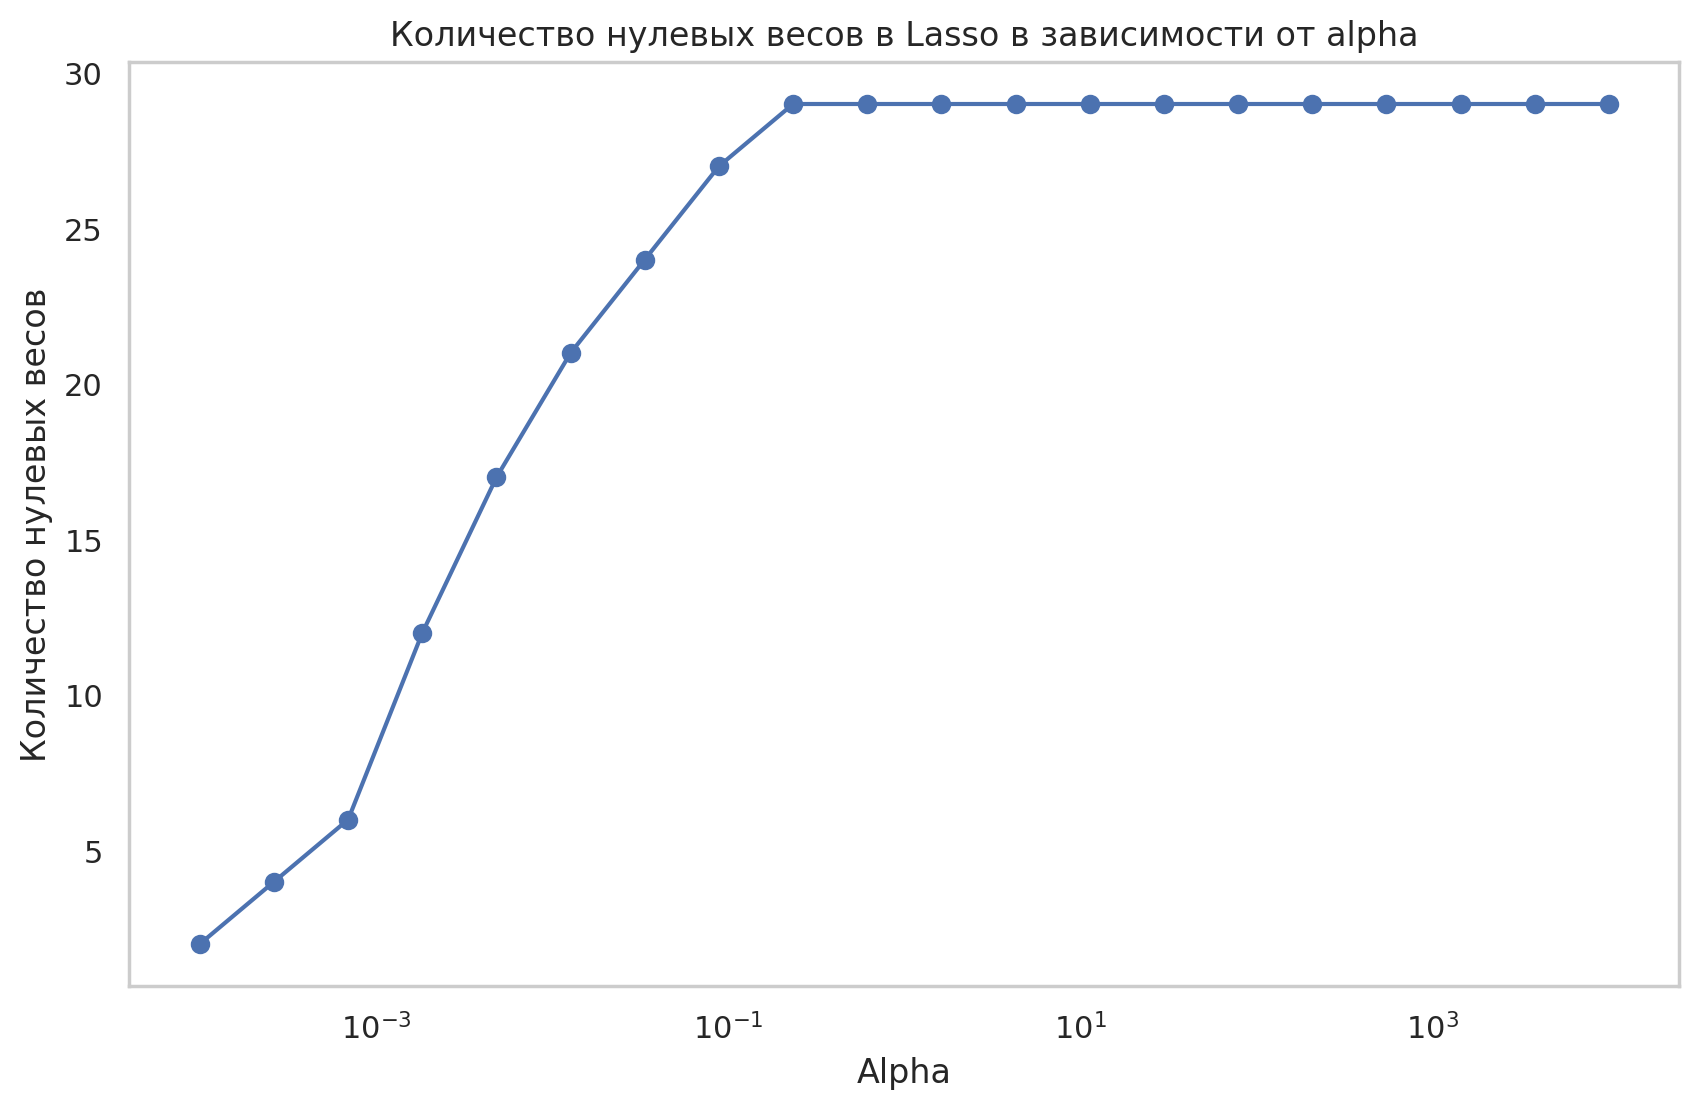

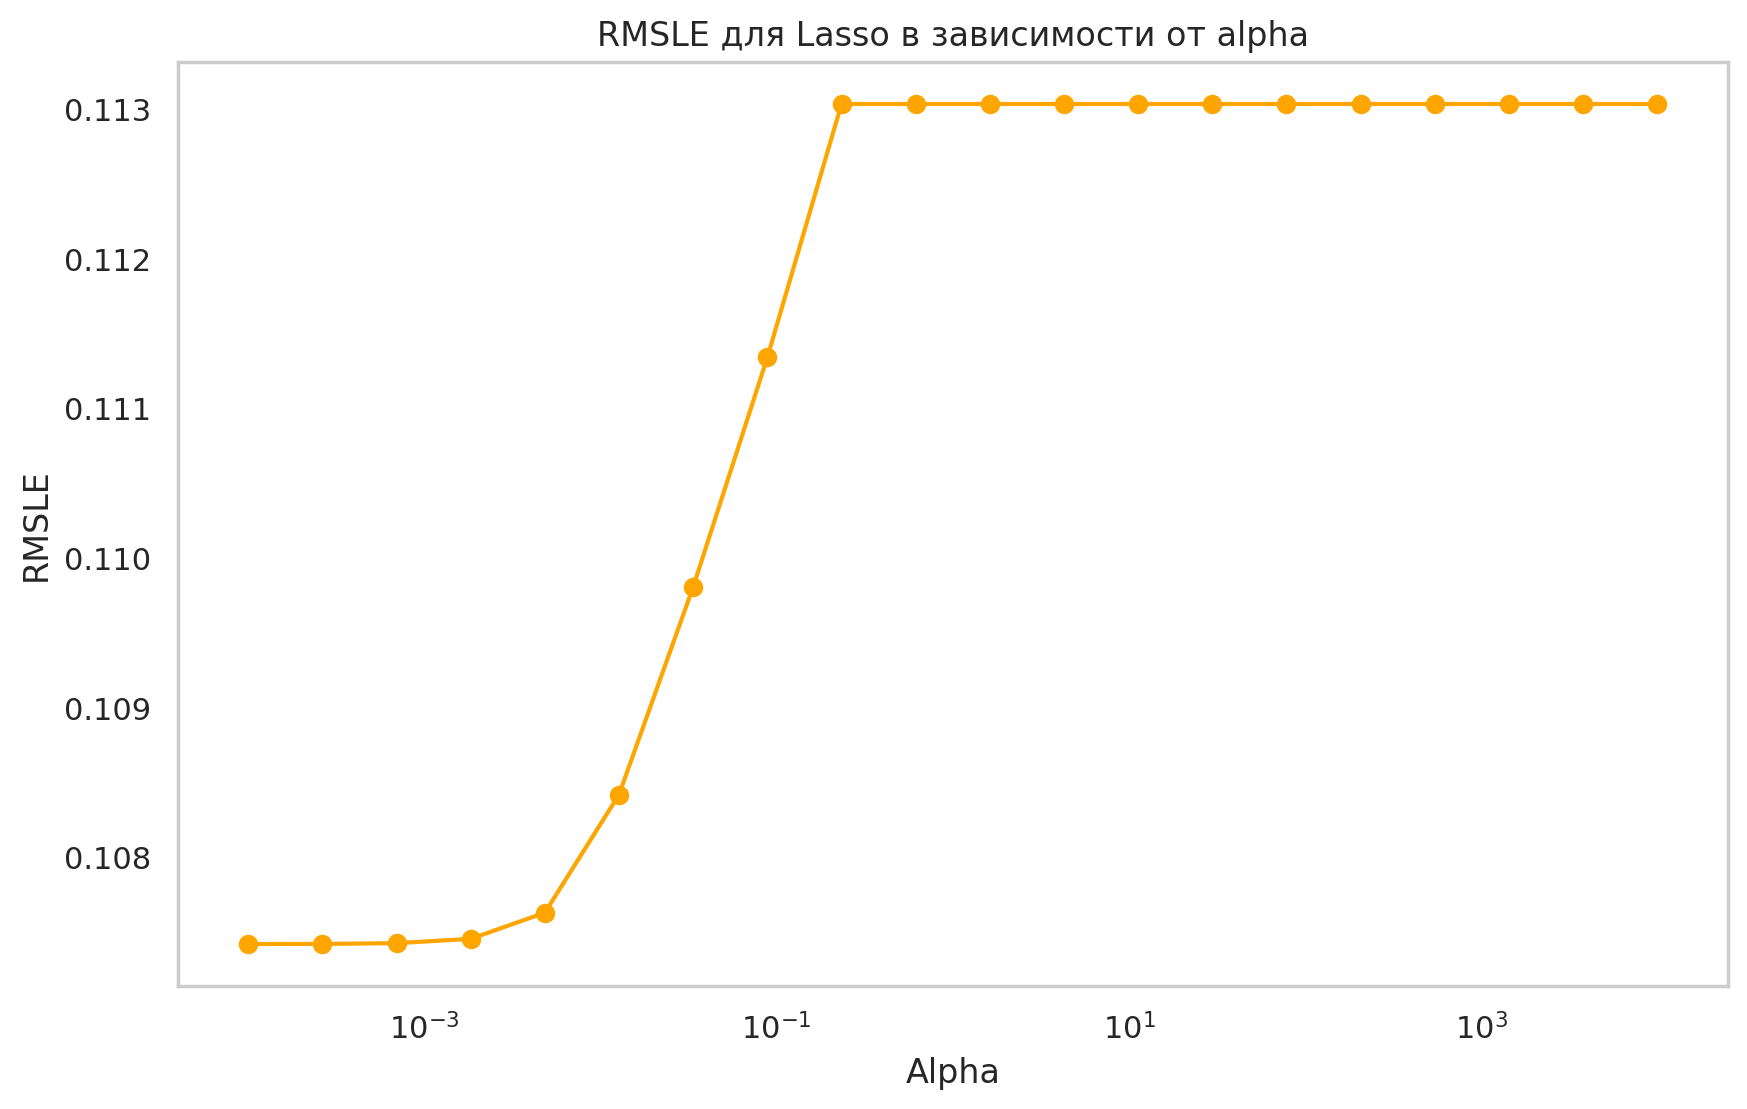

In [124]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
alpha_values = np.logspace(-4, 4, 20)
zero_weights_count = []
rmsle_values = []

# Обучение Lasso и подсчет нулевых весов
for alpha in alpha_values:
    # Создаем пайплайн
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('lasso', Lasso(alpha=alpha, random_state=42))
    ])

    # Обучаем модель
    pipeline.fit(X_train, y_train)

    # Подсчитываем нулевые веса
    zero_weights_count.append(np.sum(pipeline.named_steps['lasso'].coef_ == 0))

    # Предсказания и оценка
    y_pred = pipeline.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    rmsle_values.append(rmsle)

# Построение графика количества нулевых весов
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, zero_weights_count, marker='o')
plt.xscale('log')
plt.title('Количество нулевых весов в Lasso в зависимости от alpha')
plt.xlabel('Alpha')
plt.ylabel('Количество нулевых весов')
plt.grid()
plt.show()

# Построение графика RMSLE
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, rmsle_values, marker='o', color='orange')
plt.xscale('log')
plt.title('RMSLE для Lasso в зависимости от alpha')
plt.xlabel('Alpha')
plt.ylabel('RMSLE')
plt.grid()
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Подсчет частоты пар (pickup_cell, dropoff_cell)
pair_counts = train.groupby(['pickup_cell', 'dropoff_cell']).size().reset_index(name='count')

# Сортировка по количеству и выбор 100 самых частых пар
top_pairs = pair_counts.nlargest(100, 'count')[['pickup_cell', 'dropoff_cell']]

# Создание нового признака для кодирования частых пар
def encode_pairs(row):
    pair = (row['pickup_cell'], row['dropoff_cell'])
    if pair in top_pairs.itertuples(index=False):
        return pair
    else:
        return (-1, -1)  # Кодируем как -1 для остальных

# Применение кодирования
train['frequent_pair'] = train.apply(encode_pairs, axis=1)

# Преобразование в категориальный тип
train['frequent_pair'] = train['frequent_pair'].astype('category')

# Проверка результата
print(train['frequent_pair'].value_counts())


frequent_pair
(3, 3)      84400
(7, 7)      62926
(-1, -1)    59660
(6, 6)      37738
(3, 7)      35221
            ...  
(5, -1)       599
(0, 9)        561
(4, 11)       553
(4, 1)        543
(2, -1)       541
Name: count, Length: 100, dtype: int64


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [126]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag','frequent_pair']]
y = train['log_trip_duration']

In [127]:
categorical_features = ['in_airport_pickup', 'in_airport_dropoff', 'day_of_week', 'month', 'vendor_id', 'store_and_fwd_flag','frequent_pair']

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
y_test_pred = best_lasso_model.predict(X_test)

# Вычисление RMSLE на тестовой выборке
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print(f"RMSLE на тестовой выборке: {rmsle_test}")

RMSLE на тестовой выборке: 0.10741813858230193


**Новый признак полезен, тк благодаря ему мы получаем:**
* Идентификация популярных маршрутов: Часто определенные маршруты (пары ячеек) могут встречаться гораздо чаще, чем другие. Кодирование таких маршрутов как категориальный признак позволяет модели лучше учитывать специфику данных и выявлять зависимости, которые не видны при анализе отдельных признаков.
* Снижение размерности: Вместо того чтобы использовать два отдельных признака, которые могут не иметь очевидной связи, создание одного нового признака может помочь сосредоточить информацию и улучшить интерпретируемость модели.
* Скрытые паттерны: Взаимодействия могут раскрывать скрытые паттерны, которые неочевидны при использовании только отдельных признаков. Например, определенные маршруты могут быть связаны с разными условиями (время суток, день недели и т.д.), что может влиять на продолжительность поездки.

**Почему линейная модель не может самостоятельно "вытащить" эту информацию?**
* Линейность: Линейные модели, такие как линейная регрессия, оценивают только линейные комбинации признаков. Они не могут самостоятельно выявить сложные взаимосвязи, такие как сочетание двух признаков. Например, если модель видит только отдельные значения "ячейка A" и "ячейка B", она не сможет понять, что пара "ячейка A - ячейка B" может иметь уникальное влияние на результат.
* Отсутствие нон-линейности: Для более сложных зависимостей, таких как те, что возникают в взаимодействиях, нужны более мощные модели (например, деревья решений или нейронные сети), которые могут улавливать нон-линейные зависимости.
Линейная модель просто не имеет механизмов для распознавания таких взаимодействий.
* Информация о частоте: Кодирование частых пар как категориального признака позволяет модели сразу использовать информацию о том, как часто встречается та или иная пара, что может влиять на поведение цены или времени поездки. Эта информация не может быть извлечена из отдельных значений признаков.

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Манхэттенское расстояние (или таксометрическое расстояние) — это метрика, которая измеряет расстояние между двумя точками в прямоугольной системе координат, двигаясь только по горизонтали и вертикали. Оно называется так, потому что в Манхэттене улицы расположены в виде сетки, и такси не могут двигаться диагонально.
Манхэттенское расстояние может быть полезным для оценки расстояний в городах с прямоугольной сеткой, таких как Нью-Йорк. В контексте ваших данных, это может помочь лучше понять, как расстояние между пунктами отправления и назначения влияет на время поездки

In [130]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Функция для вычисления манхэттенского расстояния
def manhattan_distance(row):
    return abs(row['pickup_longitude'] - row['dropoff_longitude']) + abs(row['pickup_latitude'] - row['dropoff_latitude'])

# Добавление нового признака
train['manhattan_distance'] = train.apply(manhattan_distance, axis=1)

# Добавление логарифма манхэттенского расстояния
train['log_manhattan_distance'] = np.log1p(train['manhattan_distance'])  # log1p для избежания log(0)

# Корреляция с таргетом
correlation_manhattan = train['manhattan_distance'].corr(train['trip_duration'])
correlation_log_haversine = train['log_haversine'].corr(train['trip_duration'])

print(f"Корреляция манхэттенского расстояния с таргетом: {correlation_manhattan}")
print(f"Корреляция логарифма гаверсинуса с таргетом: {correlation_log_haversine}")


Корреляция манхэттенского расстояния с таргетом: 0.0842561460573022
Корреляция логарифма гаверсинуса с таргетом: 0.08282891402199188


In [131]:
# Создаем карту Нью-Йорка
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=13)

# Добавляем маркер для центра Нью-Йорка
folium.Marker(
    location=[40.7128, -74.0060],
    popup='Center of New York',
    icon=folium.Icon(color='blue')
).add_to(nyc_map)

# Добавляем линии, показывающие оси, параллельные улицам Манхэттена
# Горизонтальная ось (с запада на восток)
folium.PolyLine(locations=[[40.7128, -74.01], [40.7128, -73.99]], color='red', weight=2).add_to(nyc_map)  # Улица 42-я

# Вертикальная ось (с юга на север)
folium.PolyLine(locations=[[40.7100, -74.0060], [40.7150, -74.0060]], color='blue', weight=2).add_to(nyc_map)  # Бродвей

# Сохраняем карту в HTML файл
nyc_map.save('nyc_map.html')

# Отображаем карту
nyc_map


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'in_airport_pickup', 'in_airport_dropoff',
            'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count', 'store_and_fwd_flag','frequent_pair','log_manhattan_distance']]
y = train['log_trip_duration']

In [133]:
numerical_features = ['hour', 'day_of_year', 'is_anomaly_period','in_traffic_period', 'in_free_road_period',
            'pickup_cell', 'dropoff_cell', 'passenger_count','log_manhattan_distance']

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
best_lasso_model.fit(X_train, y_train)
# Оптимальная модель на основе лучших найденных параметров
y_test_pred = best_lasso_model.predict(X_test)

# Вычисление RMSLE на тестовой выборке
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print(f"RMSLE на тестовой выборке: {rmsle_test}")

RMSLE на тестовой выборке: 0.10741813858230193


**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [136]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

In [137]:
from IPython.display import Image, display


url = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fuainfo.org%2Fblognews%2F1553044014-kot-taksist-unikalnyy-voditel-v-harkove-video.html&psig=AOvVaw1F3gjYNDnlpTuDFnmzOe5a&ust=1730023900550000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCOD9jcrnq4kDFQAAAAAdAAAAABAE"

display(Image(url=url, width=400))